In [1]:
#Importação de pacotes
import warnings
import pandas as pd
df = pd.read_csv('chuer3.csv')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import joblib # Utilizado para salvar o modelo preditivo
from sklearn.preprocessing import LabelEncoder #Utilizada para fazer o OneHotEncoding
from sklearn.metrics import mean_squared_error,precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from imblearn import under_sampling, over_sampling #Utilizada para fazer o balanceamento de dados
from imblearn.over_sampling import SMOTE #Utilizada para fazer o balanceamento de dados
from sklearn.preprocessing import MinMaxScaler #Utilizada para fazer a padronização dos dados
from sklearn.metrics import r2_score # Utilizado para medir a acuracia do modelo preditivo
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
import time
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.options.display.float_format = '{:.2f}'.format


# PROBLEMA DE NEGÓCIO

* A rotatividade de clientes refere-se ao fenômeno em que os clientes descontinuam seu relacionamento ou assinatura com uma empresa ou provedor de serviços. Representa a taxa na qual os clientes param de usar os produtos ou serviços de uma empresa em um período específico. O churn é uma métrica importante para as empresas, pois afeta diretamente a receita, o crescimento e a retenção de clientes.

# TRADUÇÃO DA VARIAVEL

In [2]:
df_traduzida = df.rename(columns={'Age':'Idade','Gender':'Sexo','Tenure':'Posse','Usage Frequency':'FrequênciaUso','Support Calls':'ChamadaSuporte','Payment Delay':'AtrasoPagamento','Subscription Type':'TipoAssinatura','Contract Length':'DuraçãoContrato','Total Spend':'CustoTotal','Last Interaction':'ÚltimaInteração'})

# MANIPULAÇÃO E TRATAMENTO DE DADOS

In [3]:
df_traduzida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerID       440832 non-null  float64
 1   Idade            440832 non-null  float64
 2   Sexo             440832 non-null  object 
 3   Posse            440832 non-null  float64
 4   FrequênciaUso    440832 non-null  float64
 5   ChamadaSuporte   440832 non-null  float64
 6   AtrasoPagamento  440832 non-null  float64
 7   TipoAssinatura   440832 non-null  object 
 8   DuraçãoContrato  440832 non-null  object 
 9   CustoTotal       440832 non-null  float64
 10  ÚltimaInteração  440832 non-null  float64
 11  Churn            440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [4]:
# EXCLUIT COLUNAS QUE NÃO SERÃO ÚTEIS

del df_traduzida['CustomerID']

In [5]:
(df_traduzida.isnull().sum() / len(df_traduzida['Sexo']))*100

Idade              0.000227
Sexo               0.000227
Posse              0.000227
FrequênciaUso      0.000227
ChamadaSuporte     0.000227
AtrasoPagamento    0.000227
TipoAssinatura     0.000227
DuraçãoContrato    0.000227
CustoTotal         0.000227
ÚltimaInteração    0.000227
Churn              0.000227
dtype: float64

In [6]:
df_traduzida = df_traduzida.dropna()

In [7]:
df_traduzida.duplicated().sum()

0

# ANÁLISE EXPLORATÓRIA

### ESTATÍSTICA

In [8]:
df_traduzida.describe()

,Idade,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,CustoTotal,ÚltimaInteração,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


### MODA

In [9]:
from statistics import mode

mode(df_traduzida['Idade'])

50.0

In [10]:
mode(df_traduzida['Posse'])

32.0

In [11]:
mode(df_traduzida['FrequênciaUso'])

11.0

In [12]:
mode(df_traduzida['ChamadaSuporte'])

0.0

In [13]:
mode(df_traduzida['AtrasoPagamento'])

12.0

In [14]:
mode(df_traduzida['CustoTotal'])

234.0

In [15]:
mode(df_traduzida['ÚltimaInteração'])

7.0

In [16]:
mode(df_traduzida['Churn'])

1.0

### ASSIMETRIA

In [17]:
df_traduzida['Idade'].skew()

0.16201568056624352

In [18]:
df_traduzida['Posse'].skew() 

-0.061401610125141226

In [19]:
df_traduzida['FrequênciaUso'].skew() 

-0.04347347834004234

In [20]:
df_traduzida['ChamadaSuporte'].skew() 

0.6668085055364663

In [21]:
df_traduzida['AtrasoPagamento'].skew() 

0.2674071254645739

In [22]:
df_traduzida['CustoTotal'].skew()

-0.4571740758349857

In [23]:
df_traduzida['ÚltimaInteração'].skew()

0.17677405050856798

In [24]:
df_traduzida['Churn'].skew()

-0.2708805436288862

### CURTOSE

In [25]:
df_traduzida['Idade'].kurt()

-0.8648533592141359

In [26]:
df_traduzida['Posse'].kurt()

-1.1925229879486616

In [27]:
df_traduzida['FrequênciaUso'].kurt()

-1.1758148242228612

In [28]:
df_traduzida['ChamadaSuporte'].kurt()

-0.7459119616912311

In [29]:
df_traduzida['AtrasoPagamento'].kurt()

-0.8956782383639781

In [30]:
df_traduzida['ÚltimaInteração'].kurt()

-1.1537597072278512

In [31]:
df_traduzida['Churn'].kurt()

-1.9266324719959962

In [32]:
df_traduzida['CustoTotal'].kurt()

-0.7514888392126622

### HISTOGRAMA

array([[<Axes: title={'center': 'Idade'}>,
        <Axes: title={'center': 'Posse'}>,
        <Axes: title={'center': 'FrequênciaUso'}>],
       [<Axes: title={'center': 'ChamadaSuporte'}>,
        <Axes: title={'center': 'AtrasoPagamento'}>,
        <Axes: title={'center': 'CustoTotal'}>],
       [<Axes: title={'center': 'ÚltimaInteração'}>,
        <Axes: title={'center': 'Churn'}>, <Axes: >]], dtype=object)

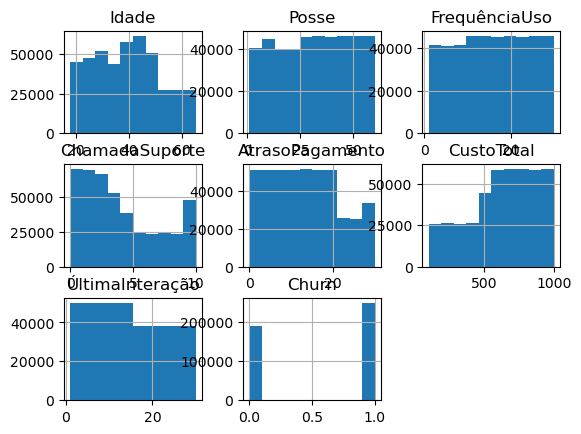

In [33]:
df_traduzida.hist()

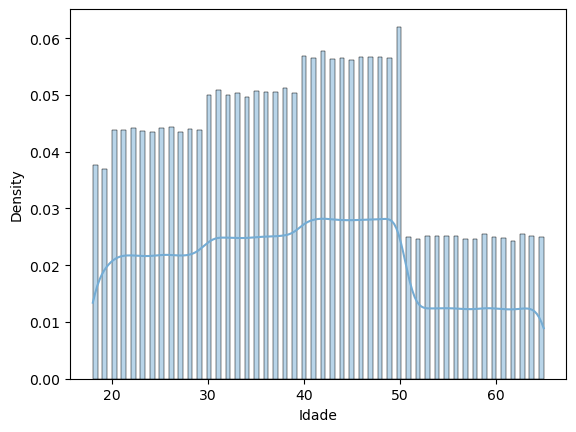

In [34]:
ax = sns.histplot(df_traduzida.Idade, stat="density", kde=True, color='#74acd4', lw=1)

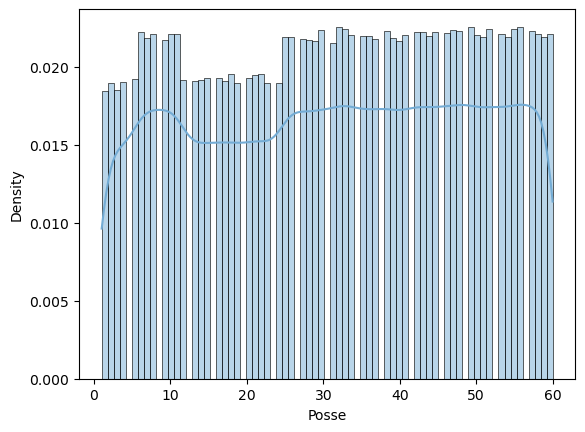

In [35]:
ax = sns.histplot(df_traduzida.Posse, stat="density", kde=True, color='#74acd4', lw=1)

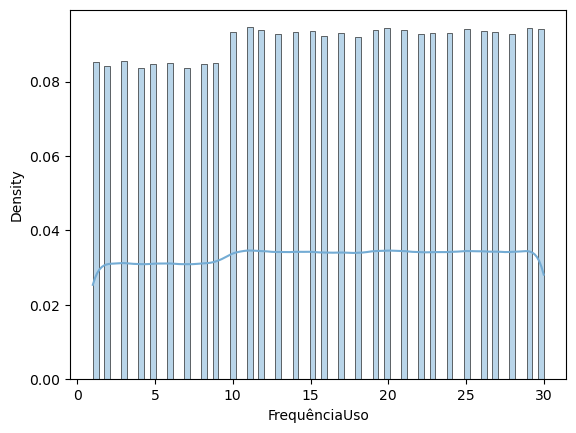

In [36]:
ax = sns.histplot(df_traduzida.FrequênciaUso, stat="density", kde=True, color='#74acd4', lw=1)

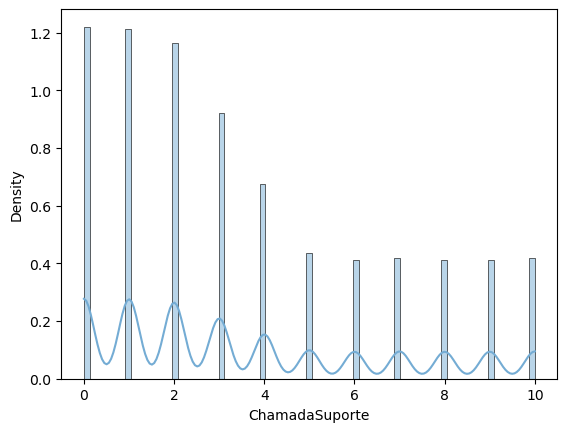

In [37]:
ax = sns.histplot(df_traduzida.ChamadaSuporte, stat="density", kde=True, color='#74acd4', lw=1)

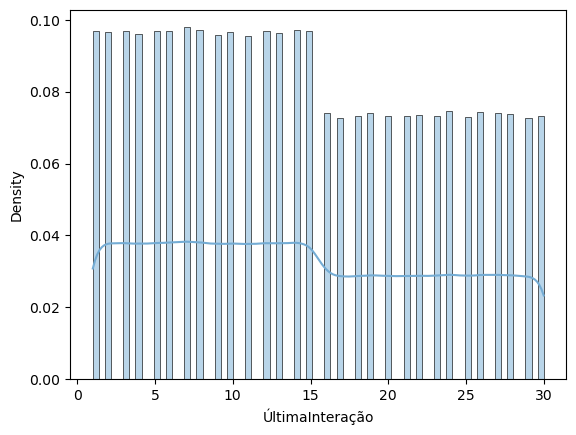

In [38]:
ax = sns.histplot(df_traduzida.ÚltimaInteração, stat="density", kde=True, color='#74acd4', lw=1)

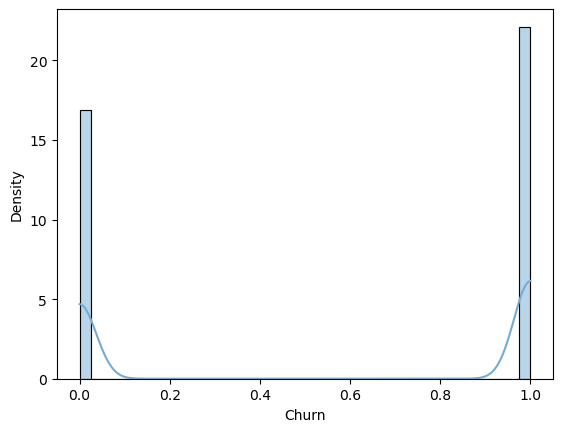

In [39]:
ax = sns.histplot(df_traduzida.Churn, stat="density", kde=True, color='#74acd4', lw=1)

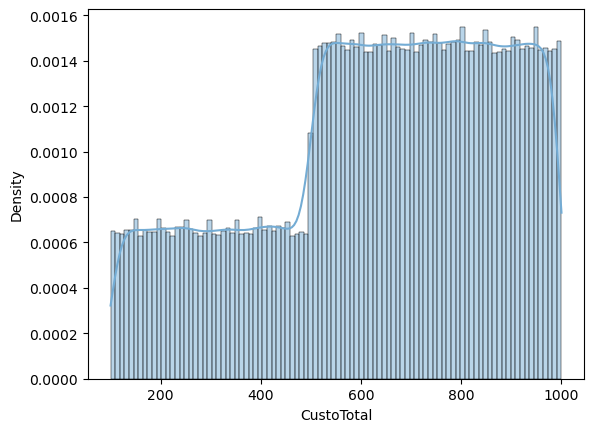

In [40]:
ax = sns.histplot(df_traduzida.CustoTotal, stat="density", kde=True, color='#74acd4', lw=1)

### valores unicos em cada variavel

In [41]:
valores_unicos = []
for i in df_traduzida.columns[0:12].tolist():
    print(i, ':', len(df_traduzida[i].astype(str).value_counts()))
    valores_unicos.append(len(df_traduzida[i].astype(str).value_counts()))

Idade : 48
Sexo : 2
Posse : 60
FrequênciaUso : 30
ChamadaSuporte : 11
AtrasoPagamento : 31
TipoAssinatura : 3
DuraçãoContrato : 3
CustoTotal : 68363
ÚltimaInteração : 30
Churn : 2


### VERIFICANDO SE HÁ CORRELAÇÃO NAS VARIAVEIS

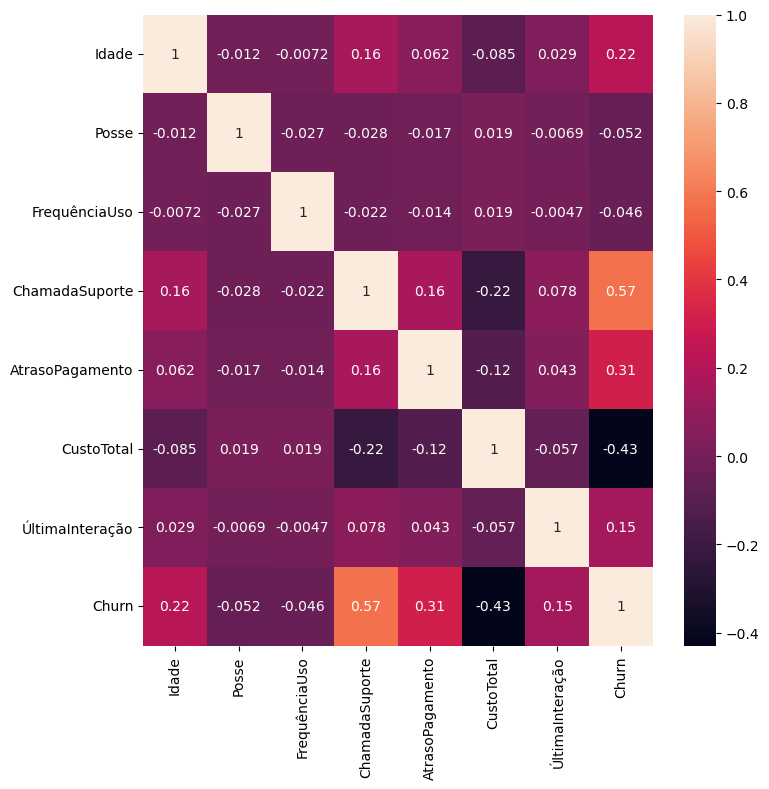

In [42]:
# Correlação
# A correção é utilizada para entender como as variaveis se relacionam entre si.
# A correção vai de -1 até +1 onde -1 significa uma forte correção negativa e +1 significa uma forte correlação positiva.
# Correlação NÃO é causalidade, ou seja, uma relação entre as variaveis não significa que uma é a causa do valor da outra.


plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["figure.figsize"] = [8.00, 8.00]
plt.rcParams["figure.autolayout"] = True
sns.heatmap(df_traduzida.corr(), annot=True)
plt.show()

## verificação de outliers 

Idade : float64
Posse : float64
FrequênciaUso : float64
ChamadaSuporte : float64
AtrasoPagamento : float64
CustoTotal : float64
ÚltimaInteração : float64
Churn : float64


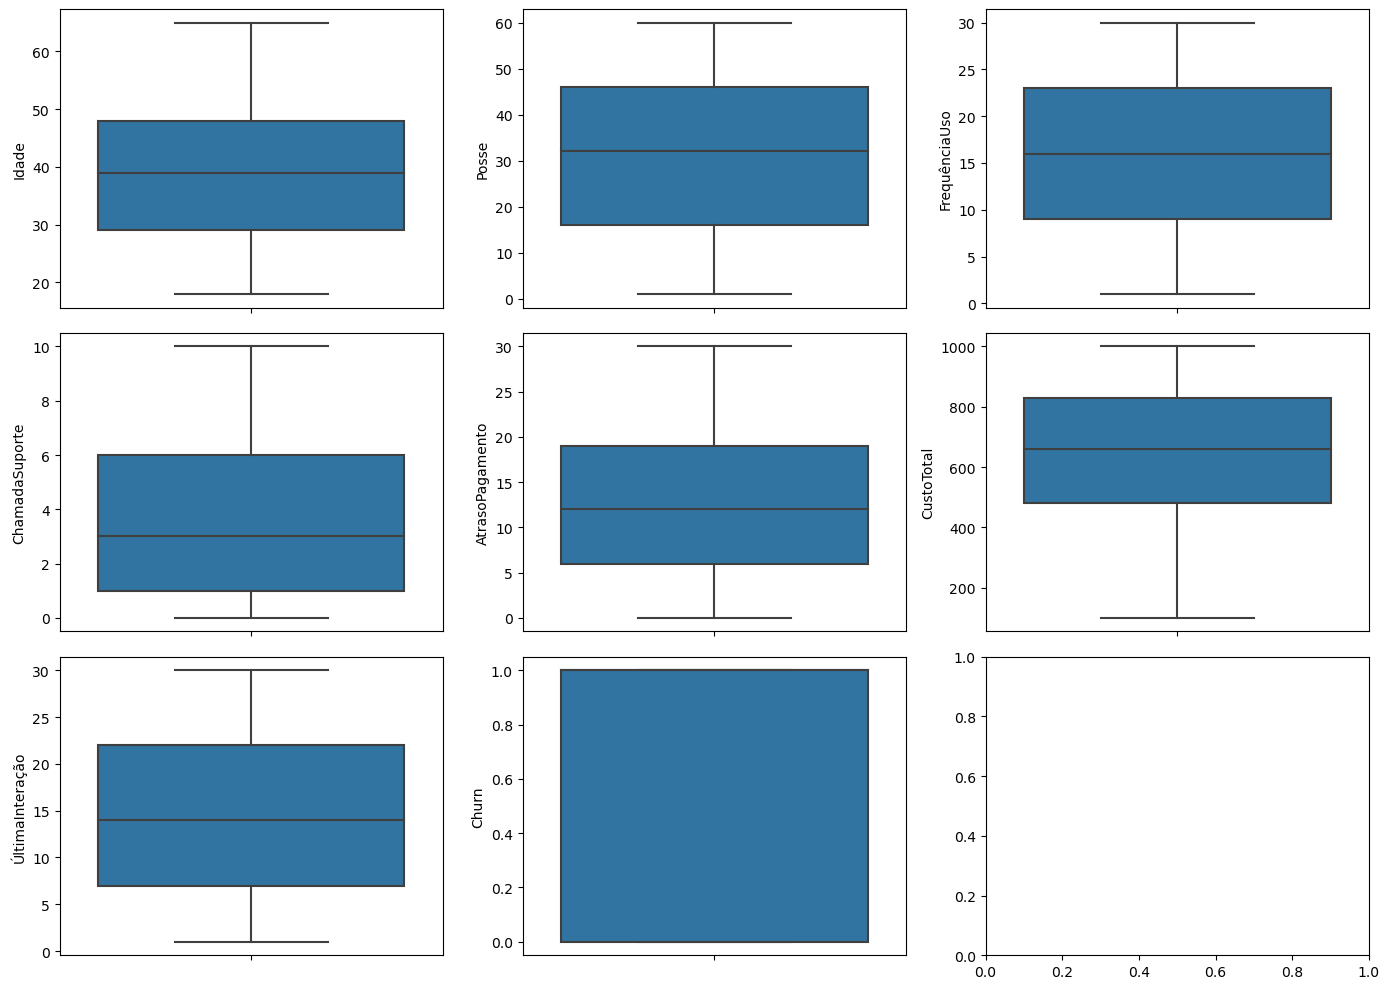

In [43]:
variaveis_numericas = []
for i in df_traduzida.columns[0:16].tolist():
        if df_traduzida.dtypes[i] == 'int64' or df_traduzida.dtypes[i] == 'float64':            
            print(i, ':' , df_traduzida.dtypes[i]) 
            variaveis_numericas.append(i)
 
    
    
    
plt.rcParams["figure.figsize"] = [14.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(3, 3) #8 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_traduzida, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show() 

### ANÁLISE EXPLORATÓRIA DOS DADOS COM PYGWALKER

In [174]:
# CODIGO ESTAR FUNCIONANDO NORMALMENTE

#!pip install pygwalker -q
import pygwalker as pyg
pyg.walk(df_traduzida)

Box(children=(HTML(value='<div id="ifr-pyg-1" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

# ANÁLISE DE DADOS

In [45]:
df_traduzida.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0


### AGRUPAMENTO DE DADOS 

In [46]:
df_traduzida.groupby(df_traduzida['Sexo']).size()

Sexo
Female    190580
Male      250252
dtype: int64

In [47]:
df_traduzida.groupby(df_traduzida['TipoAssinatura']).size()

TipoAssinatura
Basic       143026
Premium     148678
Standard    149128
dtype: int64

In [48]:
df_traduzida.groupby(df_traduzida['DuraçãoContrato']).size()

DuraçãoContrato
Annual       177198
Monthly       87104
Quarterly    176530
dtype: int64

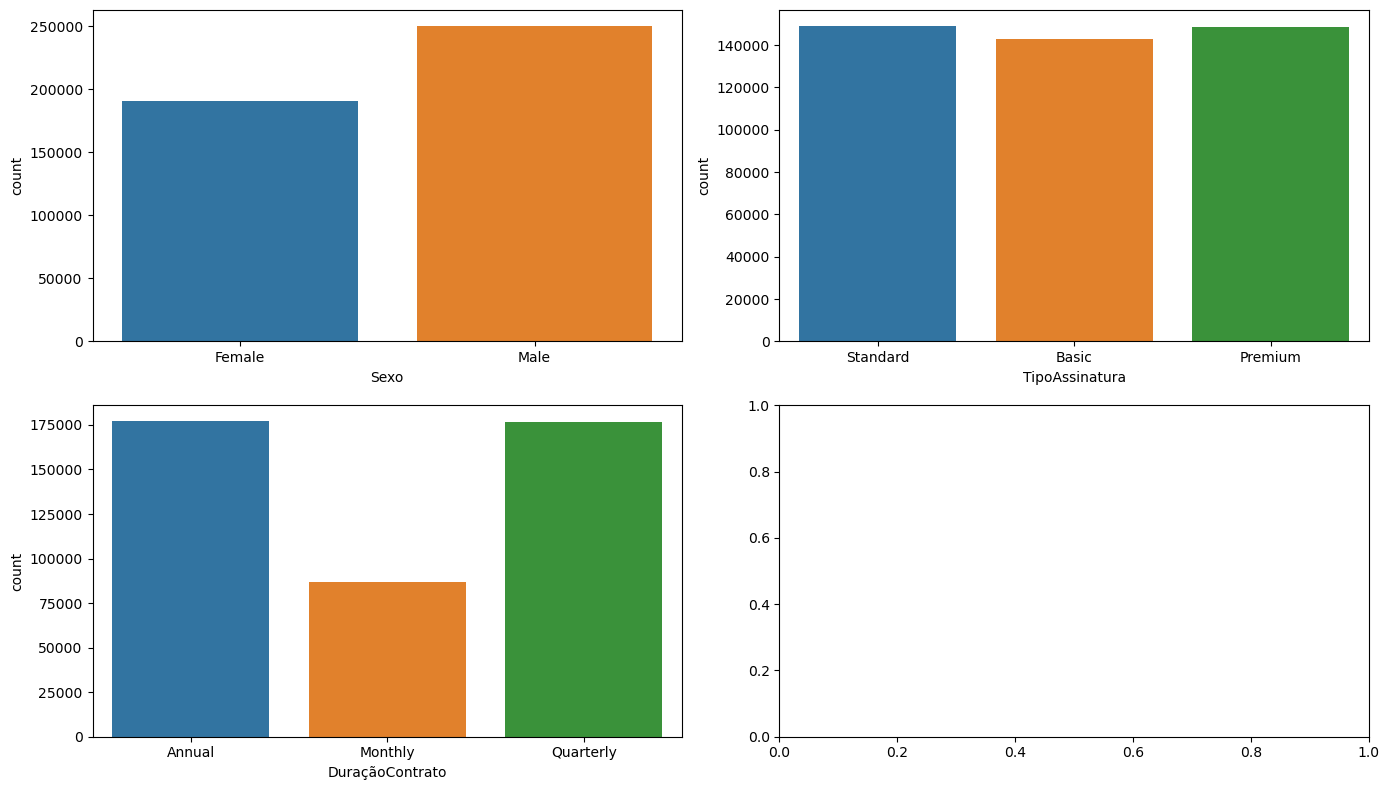

In [49]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = df_traduzida, x="Sexo", ax=axes[0][0])
sns.countplot(data = df_traduzida, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = df_traduzida, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

### UMA ANÁLISE DAS PESSOAS QUE SAIRAM

In [50]:
sairam = df_traduzida.loc[df_traduzida['Churn'] == 1 ]

In [51]:
sairam.shape

(249999, 11)

# segmentação das idades

## jovens que sairam

In [52]:
jovens  = sairam[sairam['Idade']<=29] 
jovens['Idade'].value_counts().sum()

62193

In [53]:
jovens.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


### O sexo que mais saiu

In [54]:
sairam['Sexo'].value_counts()

Female    127058
Male      122941
Name: Sexo, dtype: int64

# sexo

In [55]:
sexo = jovens.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = jovens.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada =jovens.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('ChamadaSuporte')
atraso = jovens.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = jovens.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Female,31928,493859.0,163404.0,483285.0,"$17,437,635.34"
Male,30265,469198.0,158294.0,464741.0,"$16,302,363.31"


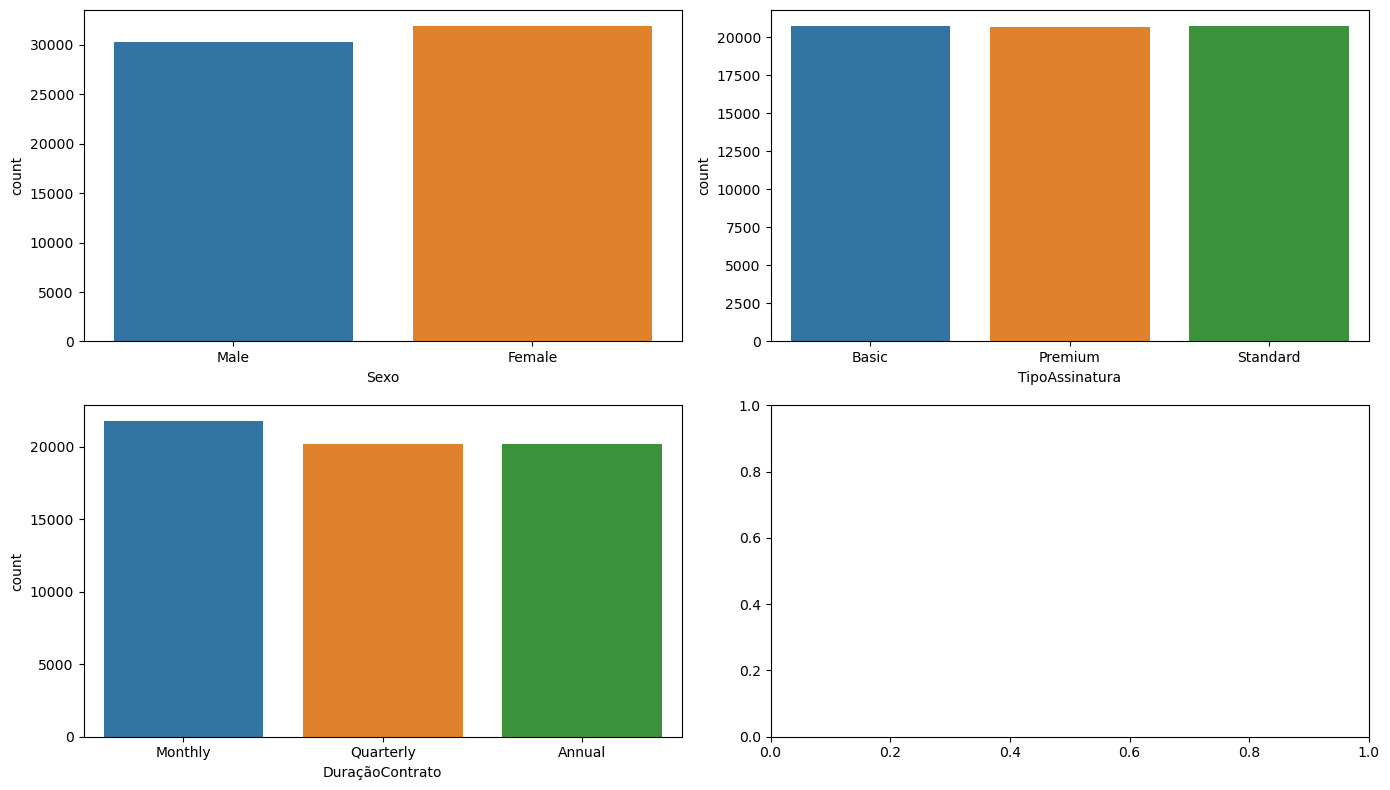

In [56]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = jovens, x="Sexo", ax=axes[0][0])
sns.countplot(data = jovens, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = jovens, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

# duração de contrato dos jovens que sairam

In [57]:
jovens.groupby(['DuraçãoContrato']).size()

DuraçãoContrato
Annual       20228
Monthly      21778
Quarterly    20187
dtype: int64

# anual

In [58]:
anual = jovens.loc[jovens['DuraçãoContrato']== 'Annual']
#anual.head(1)

In [59]:
sexo = anual.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = anual.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = anual.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = anual.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = anual.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Female,10436,161635.0,54201.0,157823.0,"$5,676,543.64"
Male,9792,151261.0,52886.0,151635.0,"$5,239,393.05"


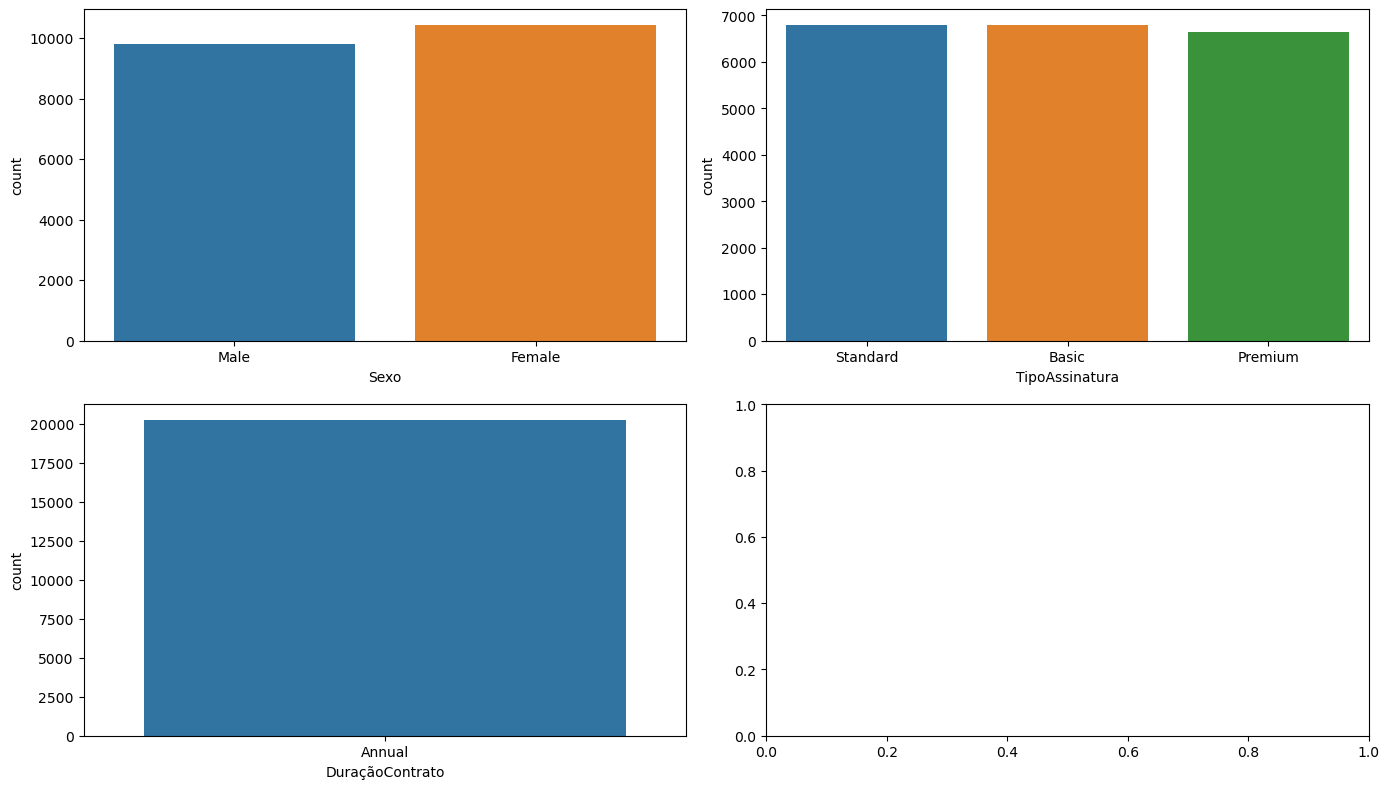

In [60]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = anual, x="Sexo", ax=axes[0][0])
sns.countplot(data = anual, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = anual, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

# mensal 

In [61]:
mensal = jovens.loc[jovens['DuraçãoContrato']== 'Monthly']
mensal.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [62]:
sexo = mensal.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = mensal.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = mensal.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = mensal.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = mensal.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Female,11030,171926.0,54907.0,165462.0,"$6,101,719.68"
Male,10748,166612.0,53550.0,162799.0,"$5,883,942.91"


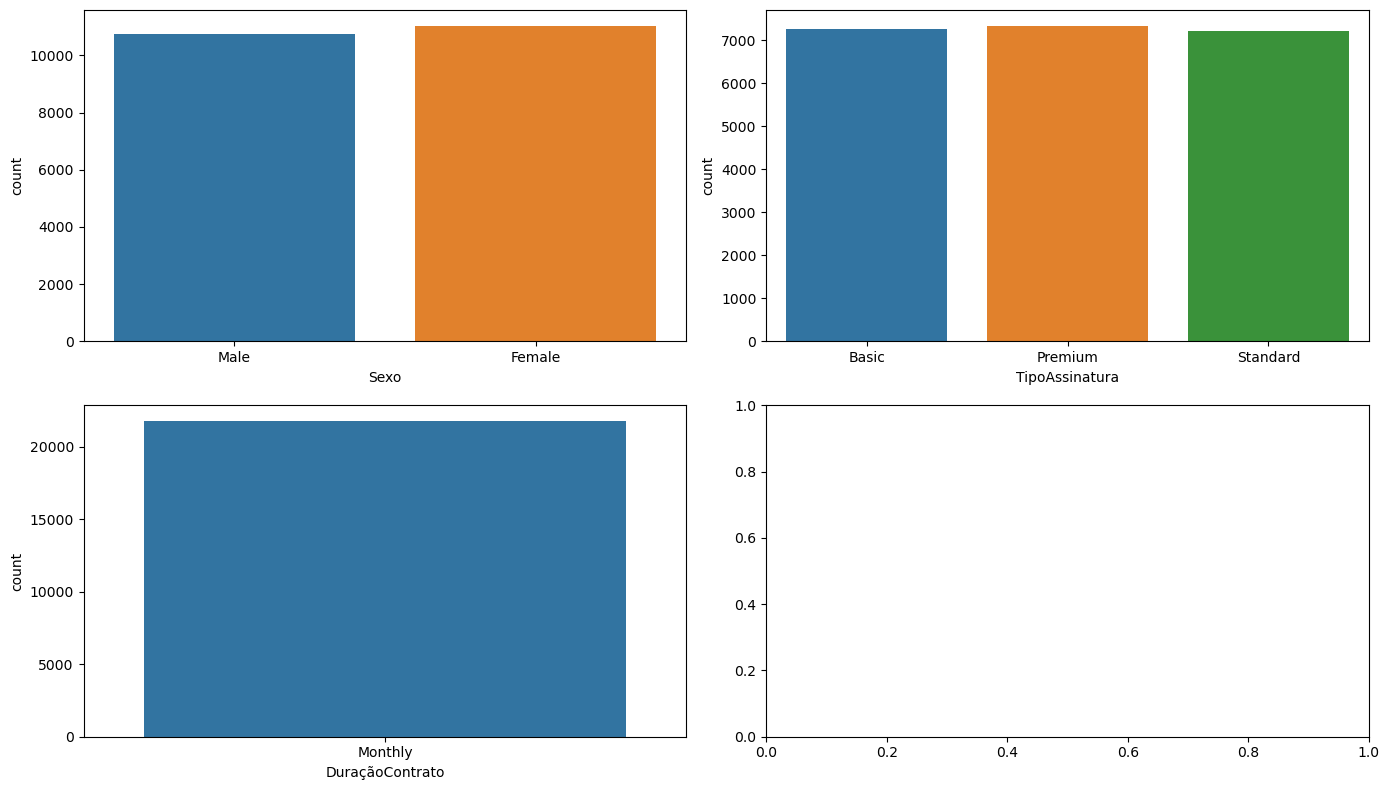

In [63]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = mensal, x="Sexo", ax=axes[0][0])
sns.countplot(data = mensal, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = mensal, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

# trimestral

In [64]:
trimestral = jovens.loc[jovens['DuraçãoContrato']== 'Quarterly']
trimestral.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
10,29.0,Male,18.0,9.0,0.0,30.0,Premium,Quarterly,930.0,18.0,1.0


In [65]:
sexo = trimestral.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = trimestral.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = trimestral.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = trimestral.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = trimestral.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Female,10462,160298.0,54296.0,160000.0,"$5,659,372.02"
Male,9725,151325.0,51858.0,150307.0,"$5,179,027.35"


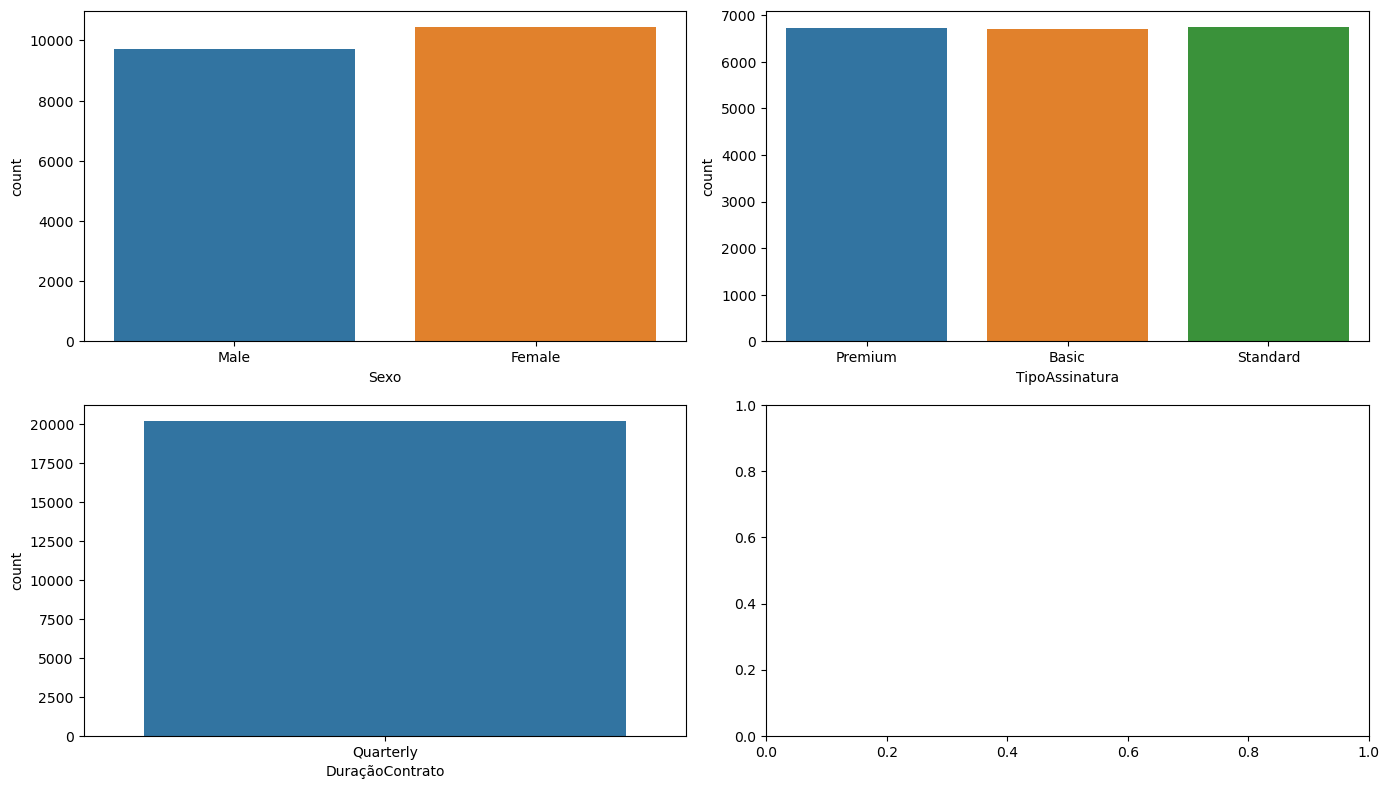

In [66]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = trimestral, x="Sexo", ax=axes[0][0])
sns.countplot(data = trimestral, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = trimestral, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

# Tipo Assinatura jovens que sairam

In [67]:
jovens.groupby(['TipoAssinatura']).size()

TipoAssinatura
Basic       20751
Premium     20699
Standard    20743
dtype: int64

### PLANO BASICO

In [68]:
basico = jovens.loc[jovens['TipoAssinatura'] == 'Basic']
basico.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [69]:
sexo = basico.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = basico.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = basico.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = basico.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = basico.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Female,10614,163812.0,54483.0,160012.0,"$5,797,544.47"
Male,10137,156627.0,53019.0,155719.0,"$5,485,544.52"


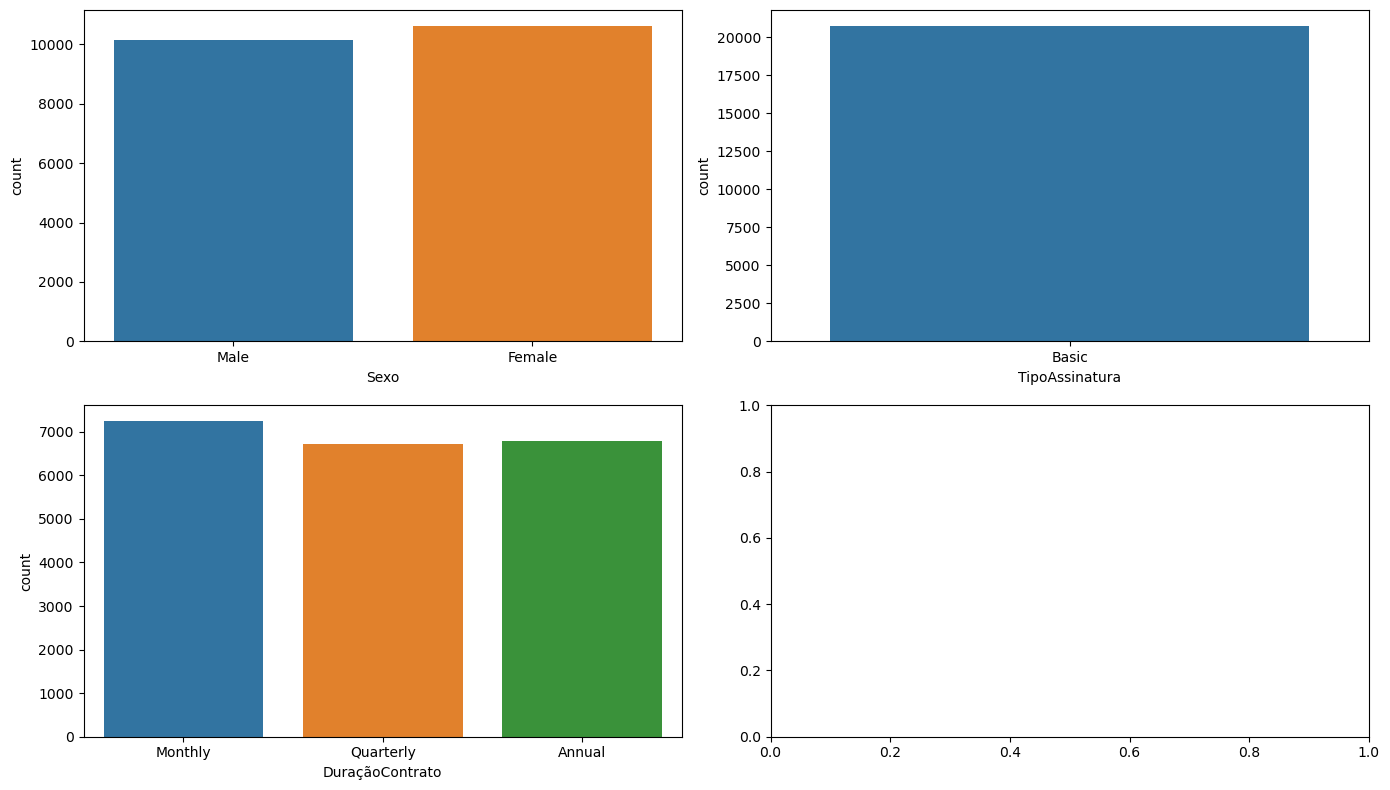

In [70]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = basico, x="Sexo", ax=axes[0][0])
sns.countplot(data = basico, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = basico, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

### PLANO PRÉMIO

In [71]:
premio = jovens.loc[jovens['TipoAssinatura'] == 'Premium']
premio.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
10,29.0,Male,18.0,9.0,0.0,30.0,Premium,Quarterly,930.0,18.0,1.0


In [72]:
sexo = premio.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = premio.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = premio.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = premio.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = premio.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Female,10701,164492.0,54586.0,161753.0,"$5,823,525.05"
Male,9998,154705.0,51890.0,153384.0,"$5,400,923.95"


### PLANO PADRÃO

In [73]:
padrao = jovens.loc[jovens['TipoAssinatura'] == 'Standard']
padrao.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
14,24.0,Male,4.0,9.0,4.0,22.0,Standard,Quarterly,204.0,4.0,1.0


In [74]:
sexo = padrao.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = padrao.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = padrao.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = padrao.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = padrao.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Female,10613,165555.0,54335.0,161520.0,"$5,816,565.82"
Male,10130,157866.0,53385.0,155638.0,"$5,415,894.84"


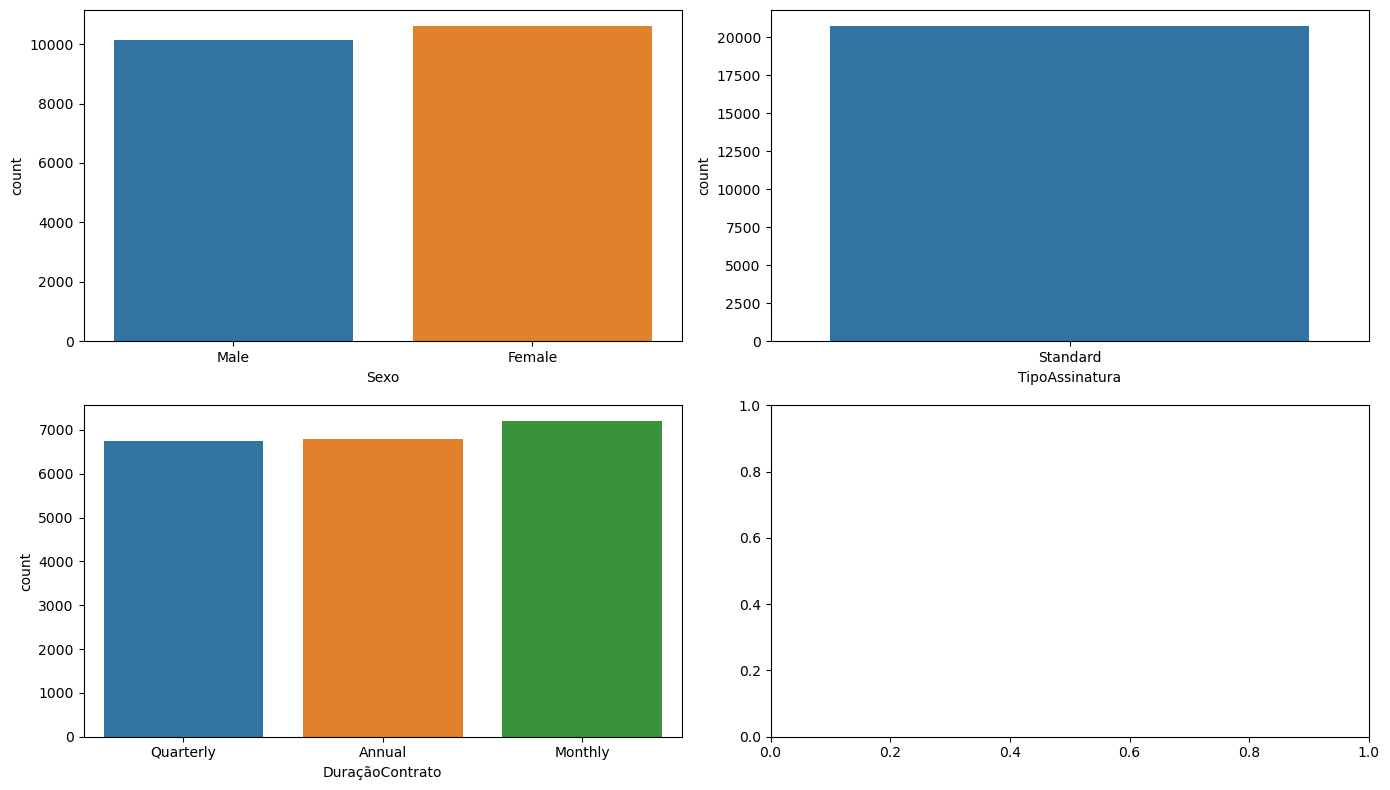

In [75]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = padrao, x="Sexo", ax=axes[0][0])
sns.countplot(data = padrao, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = padrao, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

# adultos que sairam

In [76]:
adulto = sairam.query('Idade > 29 and Idade <= 59')
adulto['Idade'].value_counts().sum()

155165

In [77]:
sexo = adulto.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = adulto.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = adulto.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = adulto.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = adulto.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Female,78879,1221533.0,401765.0,1195086.0,"$42,852,252.57"
Male,76286,1175526.0,398861.0,1171124.0,"$40,758,651.79"


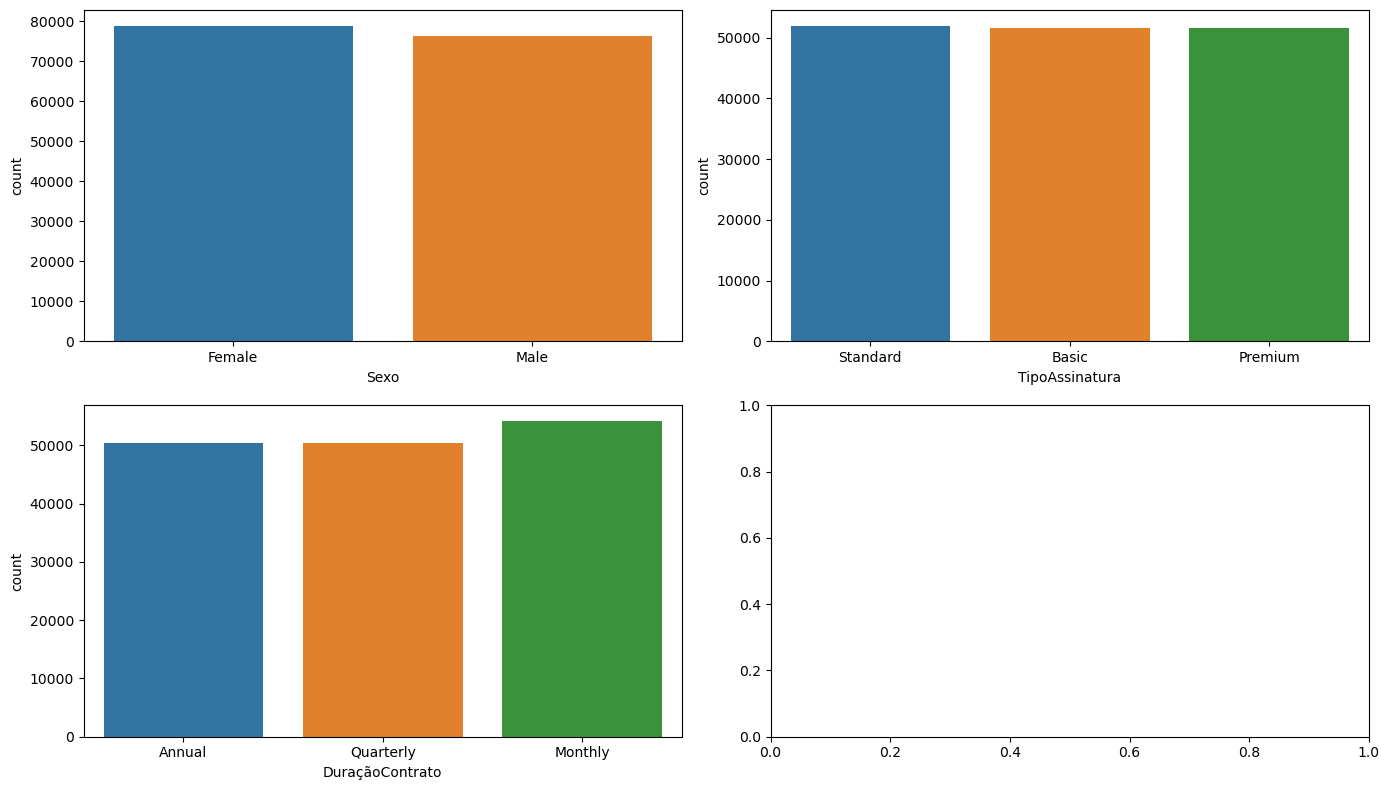

In [78]:
# Podemos observar as informações acimas todas de uma vez através de gráficos

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = adulto, x="Sexo", ax=axes[0][0])
sns.countplot(data = adulto, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = adulto, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

# duração de contrato dos adultos que sairam

In [79]:
anual_adulto = adulto.loc[adulto['DuraçãoContrato']== 'Annual']
anual_adulto.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0


# anual

In [80]:
sexo = anual_adulto.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = anual_adulto.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = anual_adulto.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = anual_adulto.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = anual_adulto.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Female,25874,398486.0,133381.0,395823.0,"$13,946,034.09"
Male,24632,379674.0,131529.0,382397.0,"$12,913,649.93"


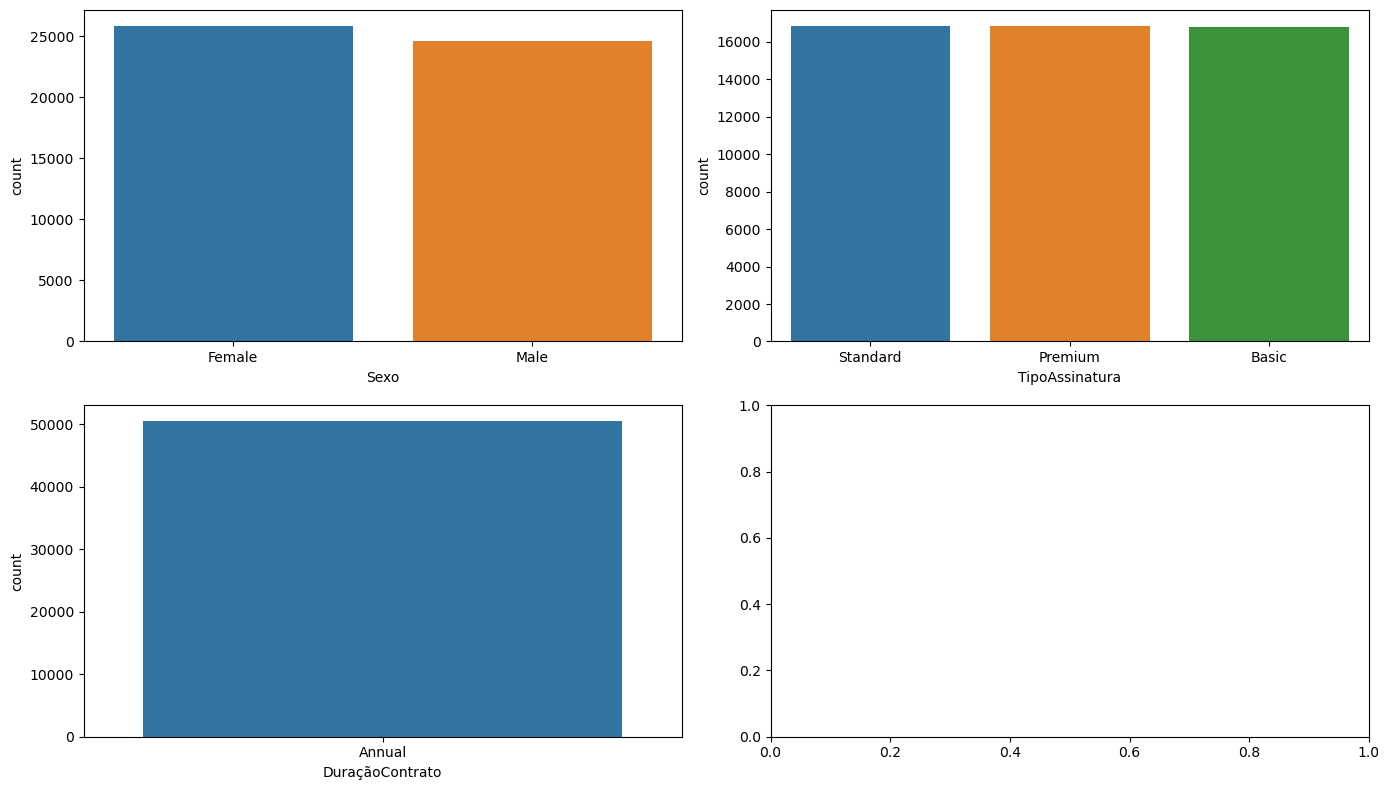

In [81]:

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = anual_adulto, x="Sexo", ax=axes[0][0])
sns.countplot(data = anual_adulto, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = anual_adulto, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

# mensal

In [82]:
mensal_adulto = adulto.loc[adulto['DuraçãoContrato']== 'Monthly']
mensal_adulto.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0


In [83]:
sexo = mensal_adulto.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = mensal_adulto.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = mensal_adulto.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = mensal_adulto.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = mensal_adulto.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Male,27215,419817.0,136238.0,409198.0,"$14,980,367.15"
Female,26985,418907.0,134038.0,403366.0,"$14,852,493.98"


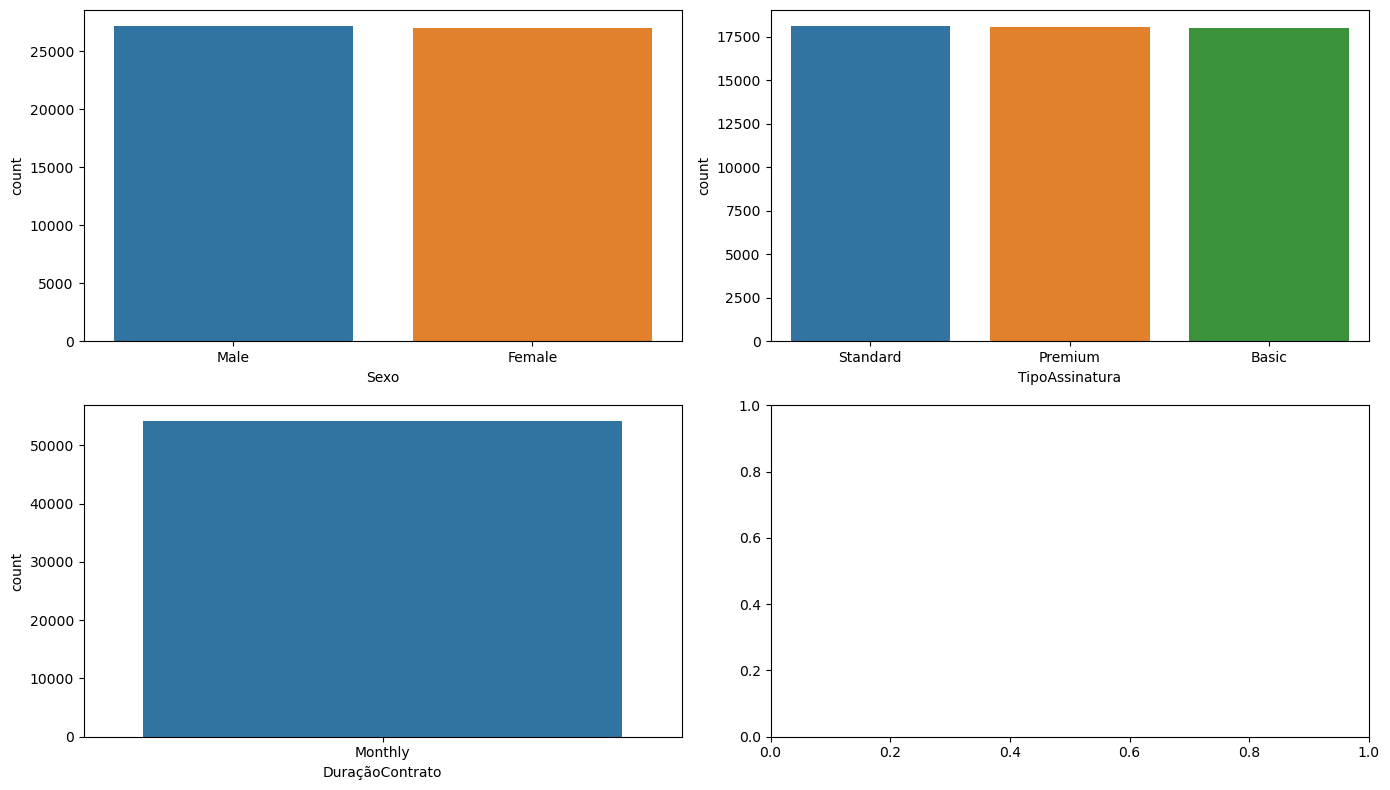

In [84]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = mensal_adulto, x="Sexo", ax=axes[0][0])
sns.countplot(data = mensal_adulto, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = mensal_adulto, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

# trimestral

In [85]:
trimestral_adulto = adulto.loc[adulto['DuraçãoContrato']== 'Quarterly']
trimestral_adulto.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0


In [86]:
sexo = trimestral_adulto.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = trimestral_adulto.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = trimestral_adulto.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = trimestral_adulto.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = trimestral_adulto.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Female,26020,404140.0,134346.0,395897.0,"$14,053,724.50"
Male,24439,376035.0,131094.0,379529.0,"$12,864,634.71"


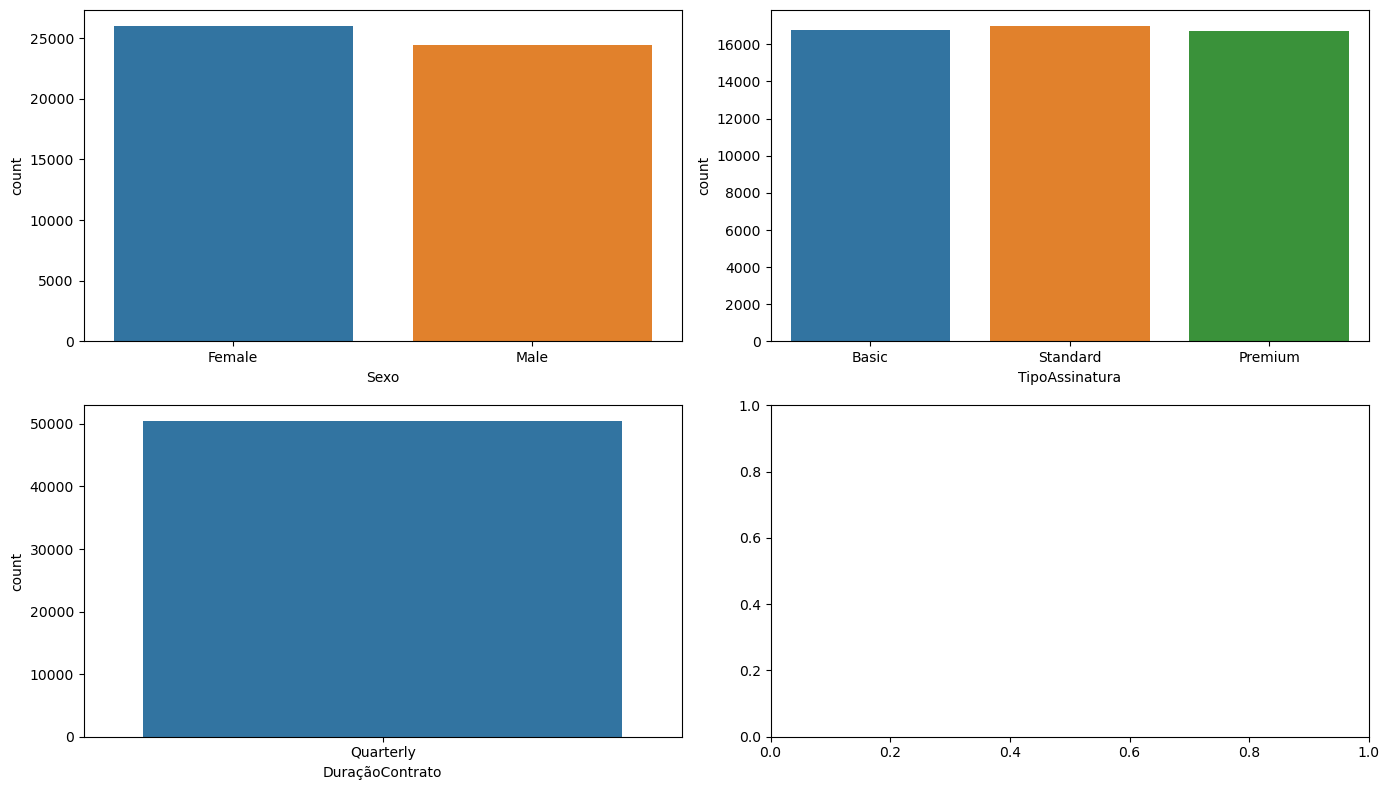

In [87]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = trimestral_adulto, x="Sexo", ax=axes[0][0])
sns.countplot(data = trimestral_adulto, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = trimestral_adulto, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

# Tipo Assinatura adultos que sairam

In [88]:
adulto.groupby(['TipoAssinatura']).size()

TipoAssinatura
Basic       51568
Premium     51644
Standard    51953
dtype: int64

### PLANO BASICO

In [89]:
basico_adulto = adulto.loc[adulto['TipoAssinatura'] == 'Basic']
basico_adulto.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0


In [90]:
sexo = basico_adulto.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = basico_adulto.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = basico_adulto.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = basico_adulto.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = basico_adulto.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Female,26054,404071.0,131723.0,392753.0,"$14,177,184.25"
Male,25514,394513.0,133693.0,392755.0,"$13,640,417.21"


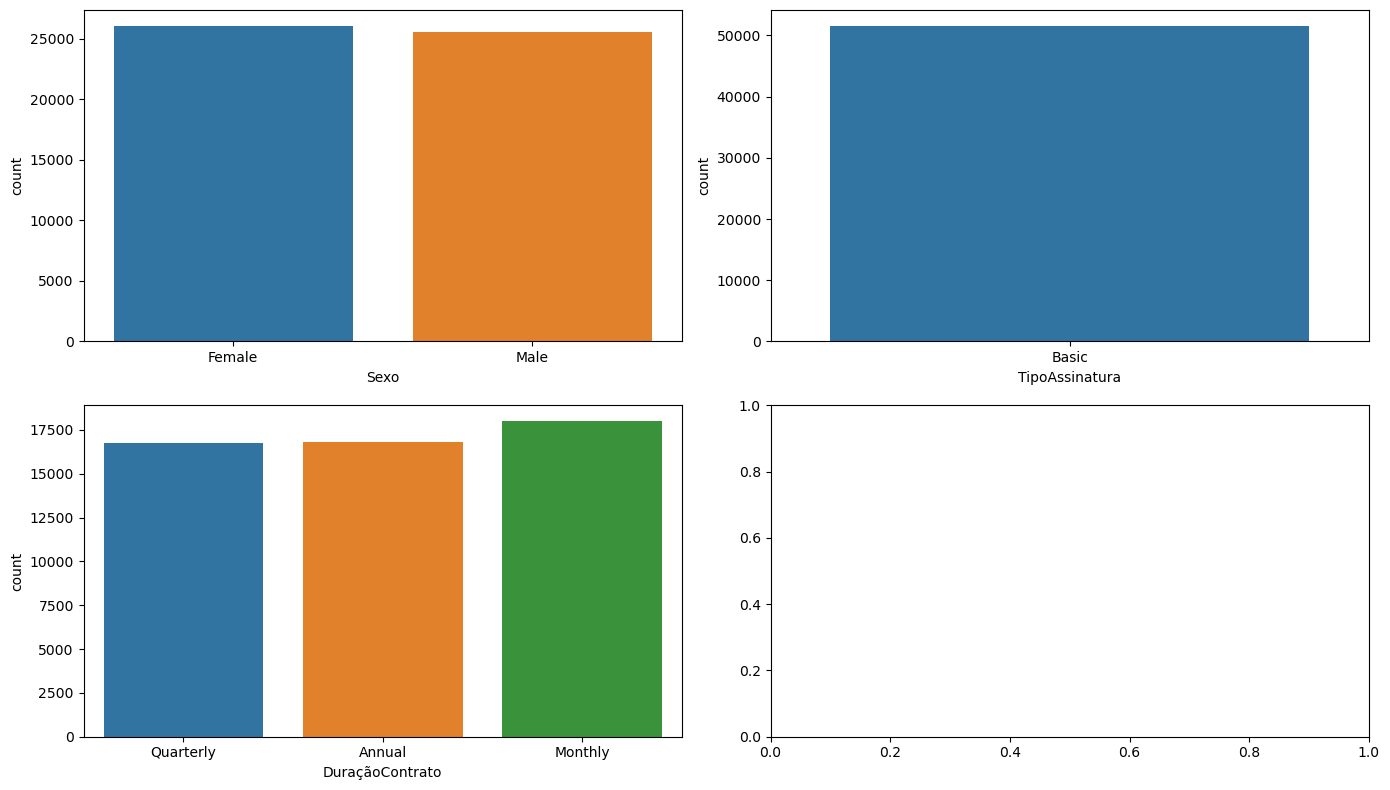

In [91]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = basico_adulto, x="Sexo", ax=axes[0][0])
sns.countplot(data = basico_adulto, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = basico_adulto, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

### PLANO PREMIO

In [92]:
premio_adulto = adulto.loc[adulto['TipoAssinatura'] == 'Premium']
premio_adulto.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
5,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0


In [93]:
sexo = premio_adulto.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = premio_adulto.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = premio_adulto.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = premio_adulto.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = premio_adulto.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Female,26264,406212.0,134101.0,397556.0,"$14,245,655.43"
Male,25380,391380.0,132932.0,388562.0,"$13,535,536.54"


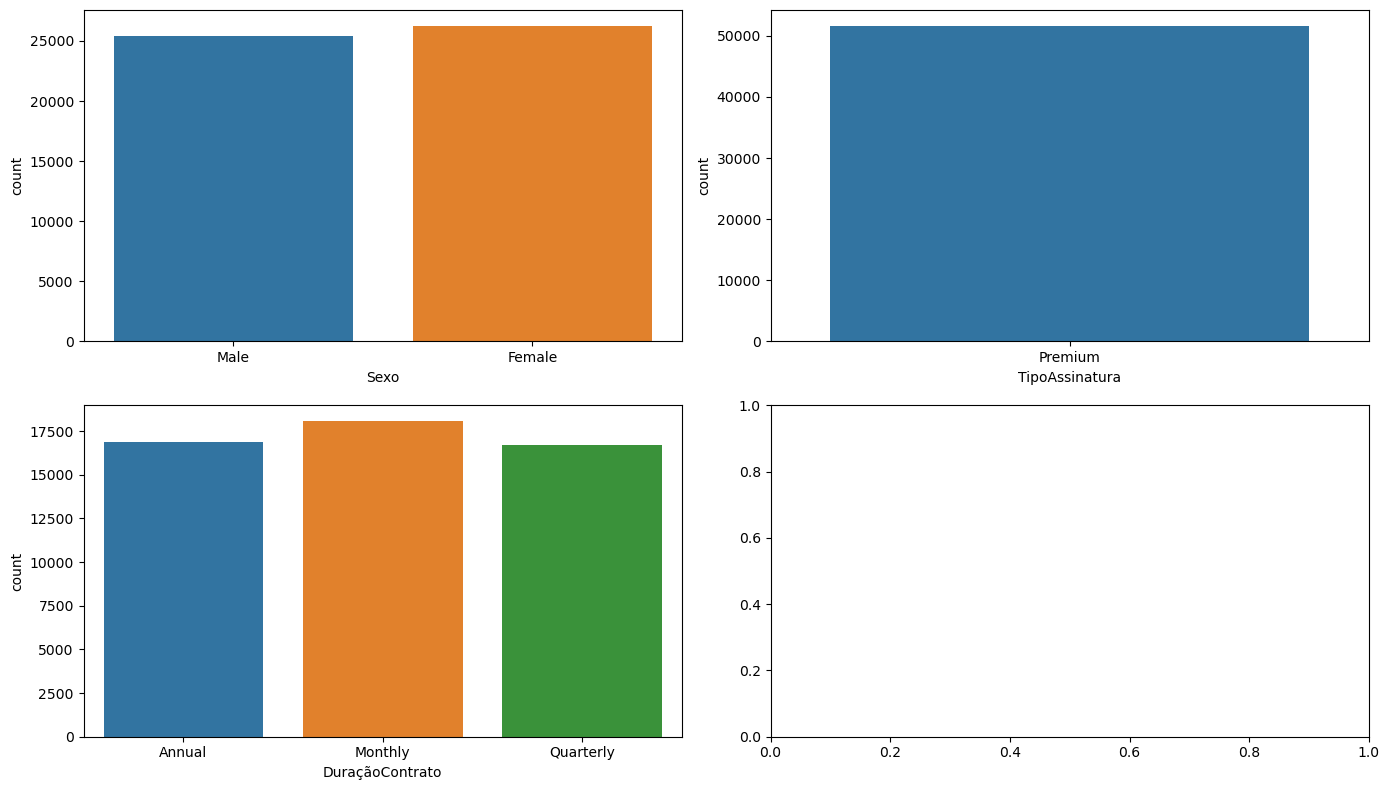

In [94]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = premio_adulto, x="Sexo", ax=axes[0][0])
sns.countplot(data = premio_adulto, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = premio_adulto, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

### PLANO PADRÃO

In [95]:
padrao_adulto = adulto.loc[adulto['TipoAssinatura'] == 'Standard']
padrao_adulto.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0


In [96]:
sexo = padrao_adulto.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = padrao_adulto.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = padrao_adulto.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = padrao_adulto.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = padrao_adulto.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Female,26561,411250.0,135941.0,404777.0,"$14,429,412.89"
Male,25392,389633.0,132236.0,389807.0,"$13,582,698.04"


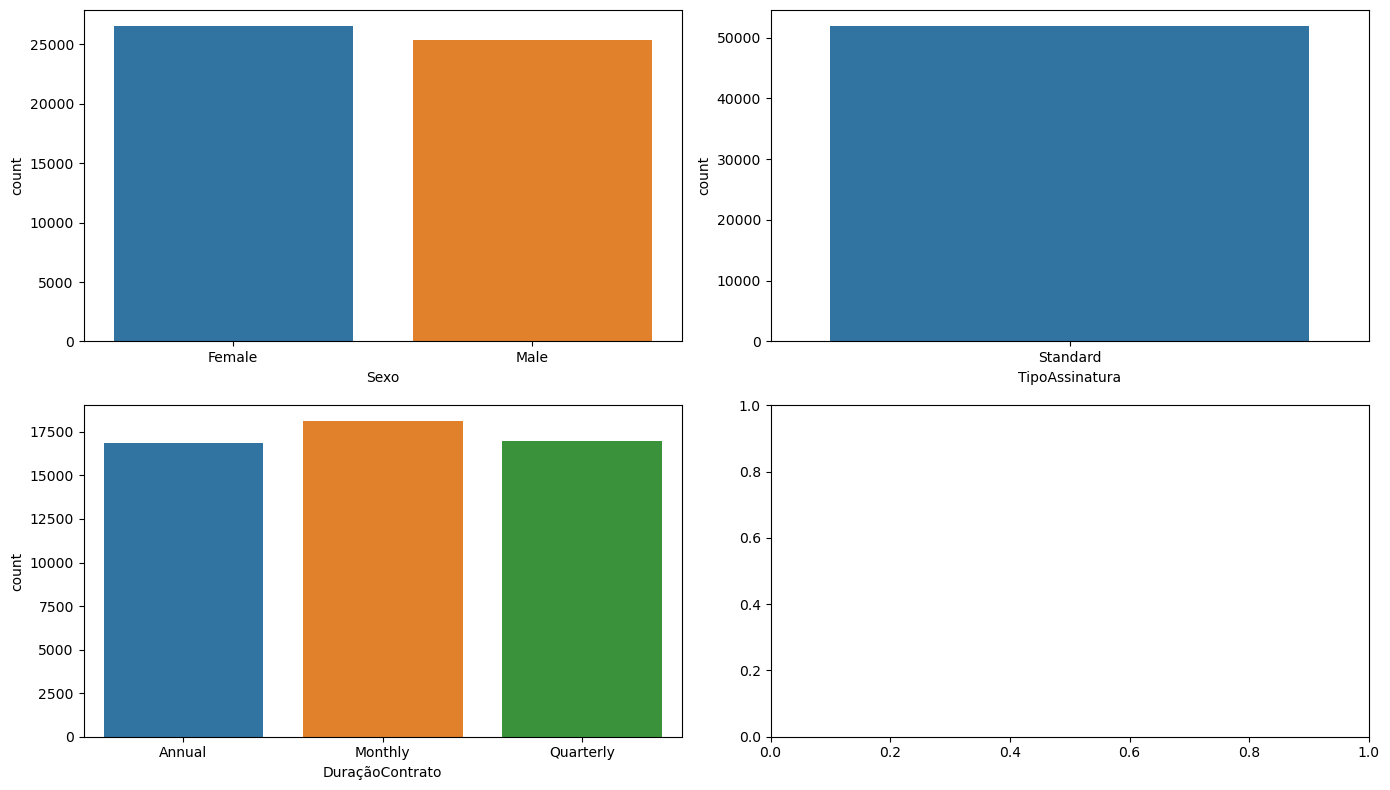

In [97]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = padrao_adulto, x="Sexo", ax=axes[0][0])
sns.countplot(data = padrao_adulto, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = padrao_adulto, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

# idoso que sairam

In [98]:
idoso = sairam.query('Idade > 59 and Idade <= 65')
idoso['Idade'].value_counts().sum()

32641

# sexo

In [99]:
sexo = idoso.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = idoso.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = idoso.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = idoso.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = idoso.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Male,16390,254536.0,81800.0,245136.0,"$9,004,862.88"
Female,16251,250747.0,82086.0,245045.0,"$8,965,074.71"


In [100]:
anual_idoso = idoso.loc[idoso['DuraçãoContrato']== 'Annual']
anual_idoso.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
27,65.0,Female,29.0,29.0,0.0,5.0,Premium,Annual,857.0,18.0,1.0


In [101]:
sexo = anual_idoso.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = anual_idoso.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = anual_idoso.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = anual_idoso.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = anual_idoso.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Male,5497,85649.0,27665.0,82544.0,"$3,032,164.40"
Female,5415,83731.0,27198.0,81246.0,"$2,995,808.69"


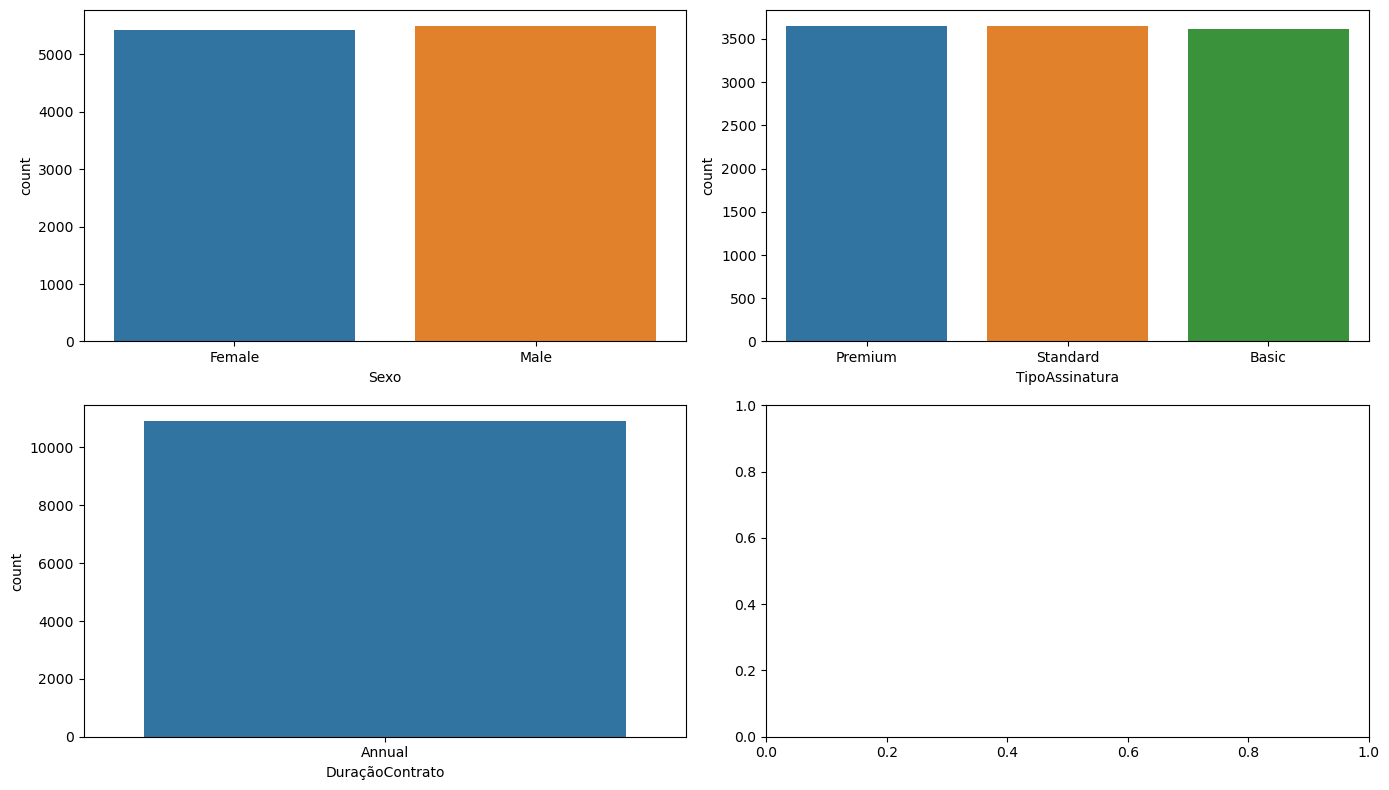

In [102]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = anual_idoso, x="Sexo", ax=axes[0][0])
sns.countplot(data = anual_idoso, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = anual_idoso, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

# duração de contrato dos idosos que sairam

# mensal

In [103]:
mensal_idoso = idoso.loc[idoso['DuraçãoContrato']== 'Monthly']
mensal_idoso.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0


In [104]:
sexo = mensal_idoso.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = mensal_idoso.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = mensal_idoso.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = mensal_idoso.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = mensal_idoso.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Male,5605,88011.0,27670.0,83409.0,"$3,085,584.24"
Female,5521,84766.0,27867.0,82953.0,"$3,056,926.53"


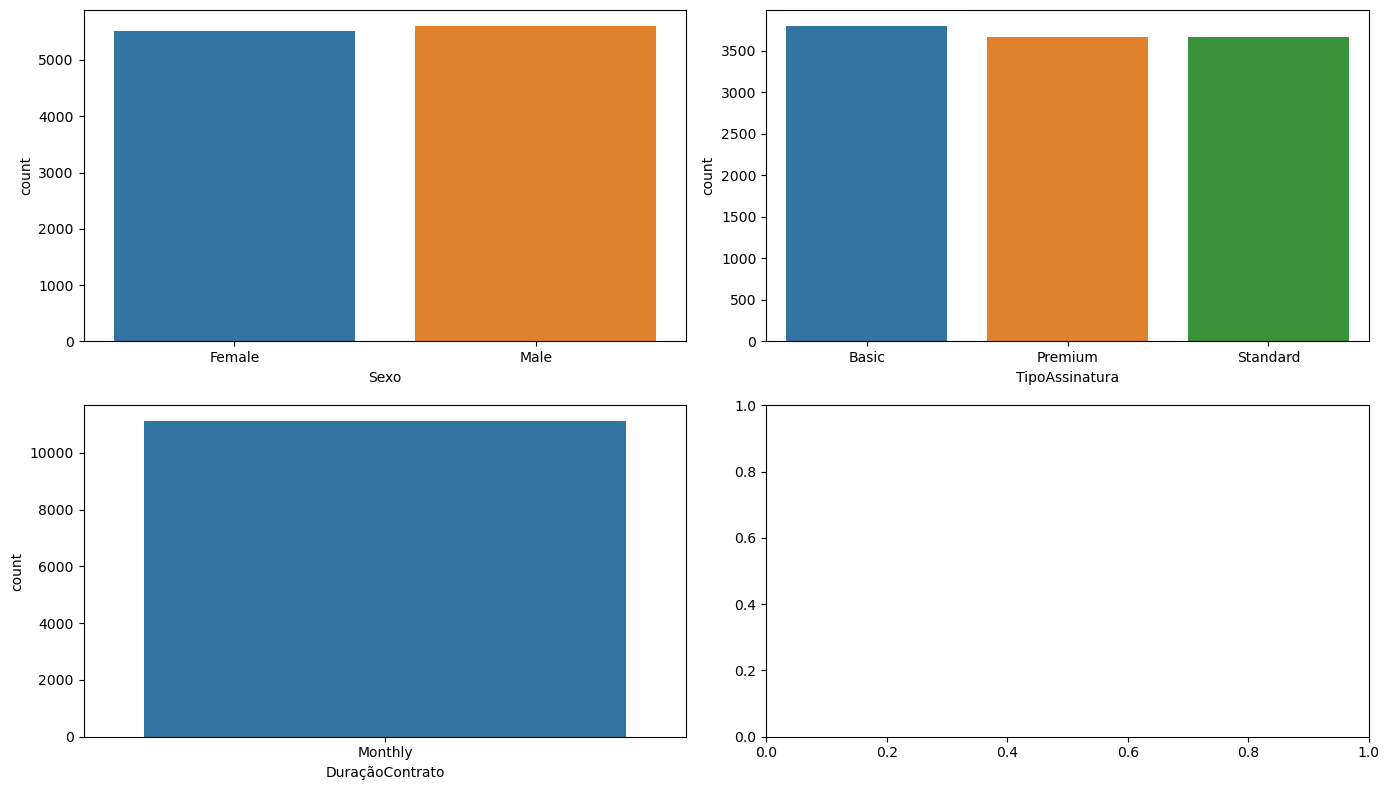

In [105]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = mensal_idoso, x="Sexo", ax=axes[0][0])
sns.countplot(data = mensal_idoso, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = mensal_idoso, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

# trimestral

In [106]:
trimestral_idoso = idoso.loc[idoso['DuraçãoContrato']== 'Quarterly']
trimestral_idoso.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
9,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [107]:
sexo = trimestral_idoso.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = trimestral_idoso.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = trimestral_idoso.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = trimestral_idoso.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = trimestral_idoso.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Female,5315,82250.0,27021.0,80846.0,"$2,912,339.49"
Male,5288,80876.0,26465.0,79183.0,"$2,887,114.24"


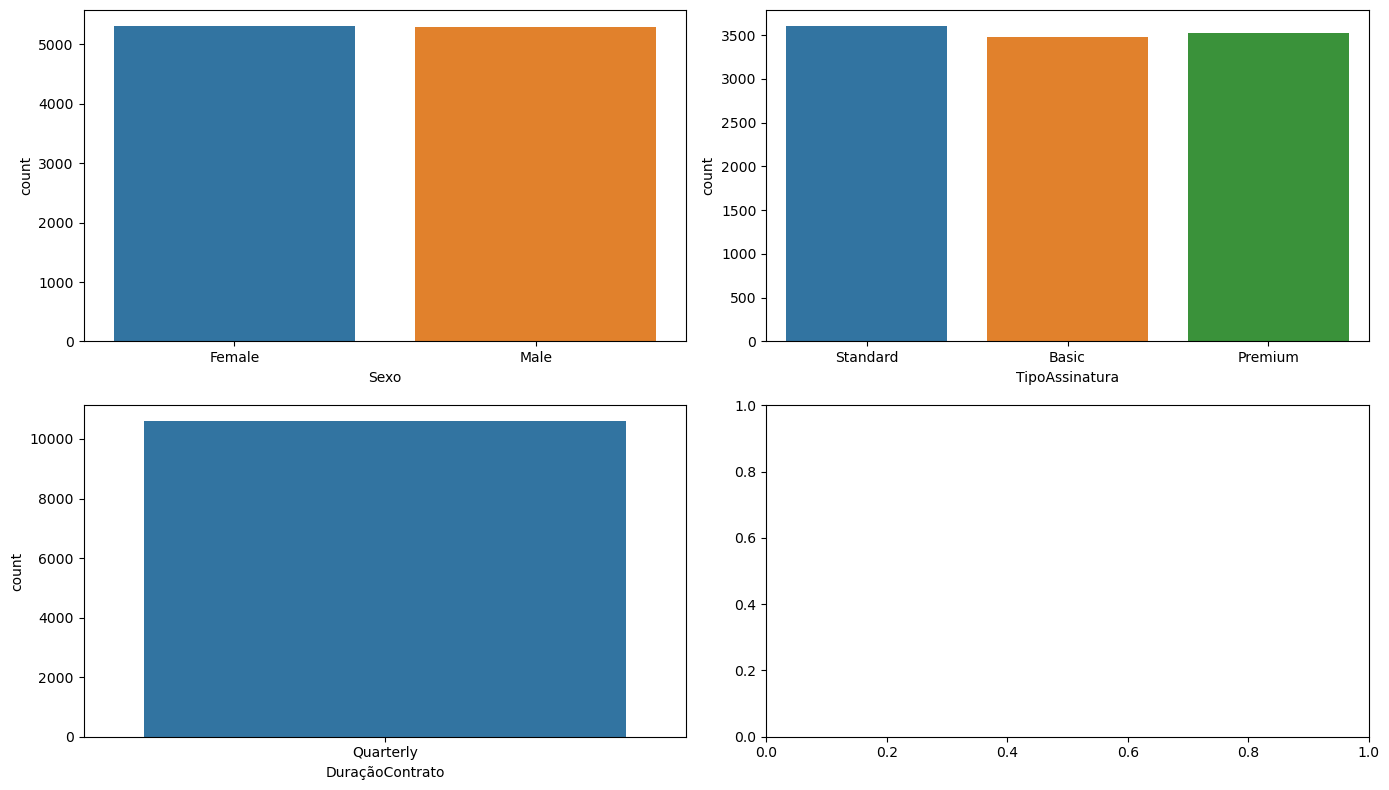

In [108]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = trimestral_idoso, x="Sexo", ax=axes[0][0])
sns.countplot(data = trimestral_idoso, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = trimestral_idoso, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

# Tipo Assinatura idosos que sairam

In [109]:
idoso.groupby(['TipoAssinatura']).size()

TipoAssinatura
Basic       10891
Premium     10830
Standard    10920
dtype: int64

### PLANO BASICO

In [110]:
basico_idoso = idoso.loc[idoso['TipoAssinatura'] == 'Basic']
basico_idoso.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0


In [111]:
sexo = basico_idoso.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = basico_idoso.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = basico_idoso.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = basico_idoso.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = basico_idoso.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Male,5503,86630.0,27258.0,82312.0,"$3,018,341.94"
Female,5388,83171.0,27214.0,80617.0,"$2,959,390.76"


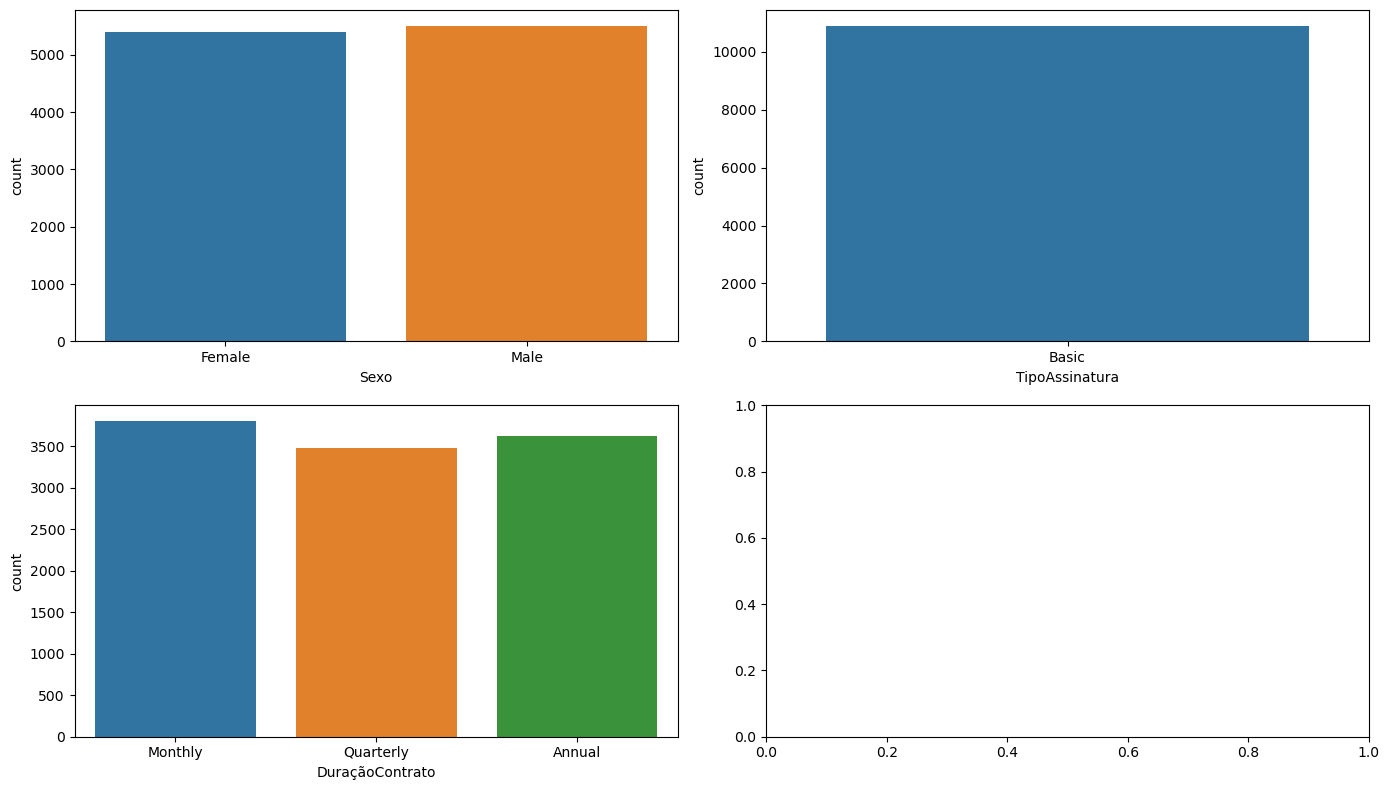

In [112]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = basico_idoso, x="Sexo", ax=axes[0][0])
sns.countplot(data = basico_idoso, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = basico_idoso, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

### PLANO PREMIO

In [113]:
premio_idoso = idoso.loc[idoso['TipoAssinatura'] == 'Premium']
premio_idoso.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
27,65.0,Female,29.0,29.0,0.0,5.0,Premium,Annual,857.0,18.0,1.0


In [114]:
sexo = premio_idoso.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = premio_idoso.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = premio_idoso.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = premio_idoso.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = premio_idoso.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Male,5463,84825.0,27396.0,81839.0,"$2,991,898.99"
Female,5367,83351.0,26852.0,81489.0,"$2,969,094.29"


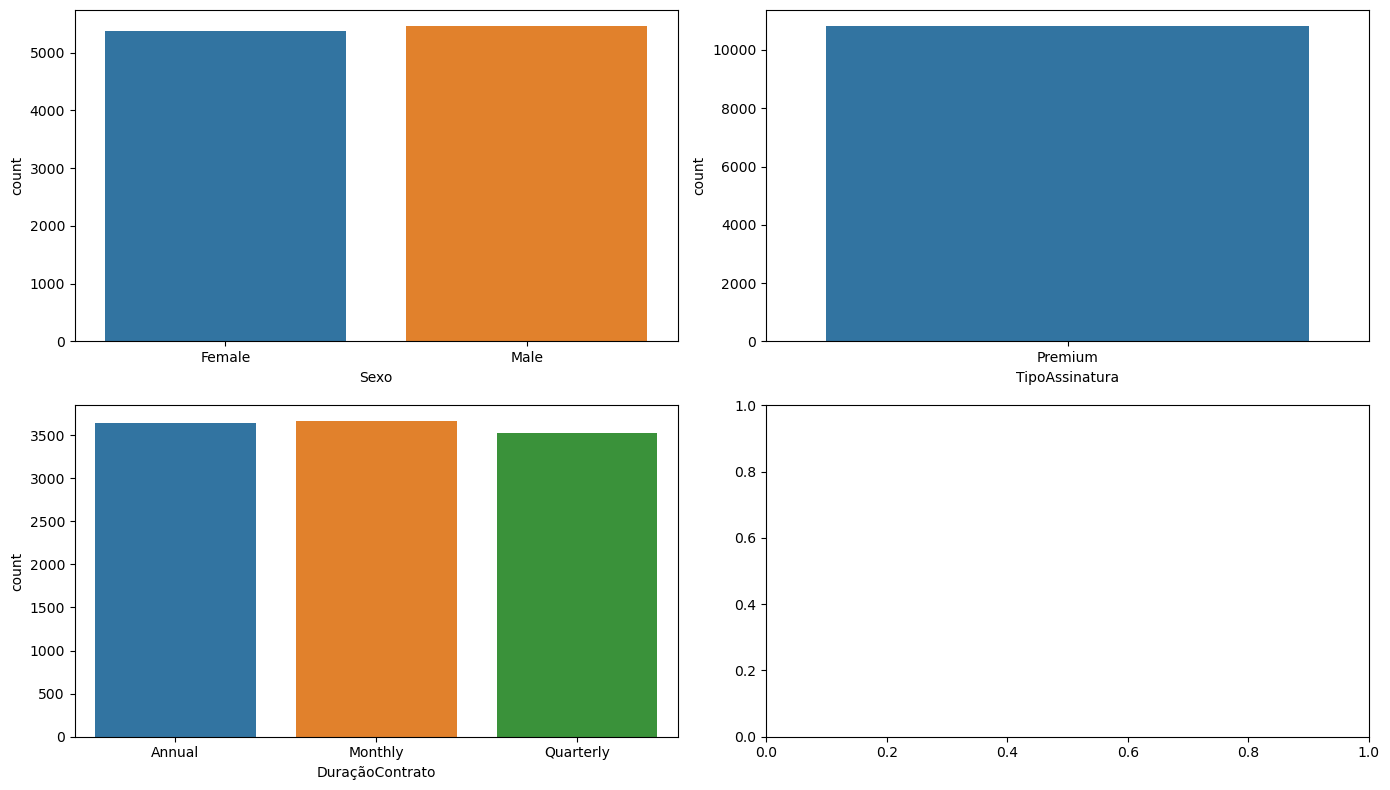

In [115]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = premio_idoso, x="Sexo", ax=axes[0][0])
sns.countplot(data = premio_idoso, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = premio_idoso, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

### PLANO PADRÃO 

In [116]:
padrao_idoso = idoso.loc[idoso['TipoAssinatura'] == 'Premium']
padrao_idoso.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
27,65.0,Female,29.0,29.0,0.0,5.0,Premium,Annual,857.0,18.0,1.0


In [117]:
sexo = padrao_idoso.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = padrao_idoso.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = padrao_idoso.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = padrao_idoso.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = padrao_idoso.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Male,5463,84825.0,27396.0,81839.0,"$2,991,898.99"
Female,5367,83351.0,26852.0,81489.0,"$2,969,094.29"


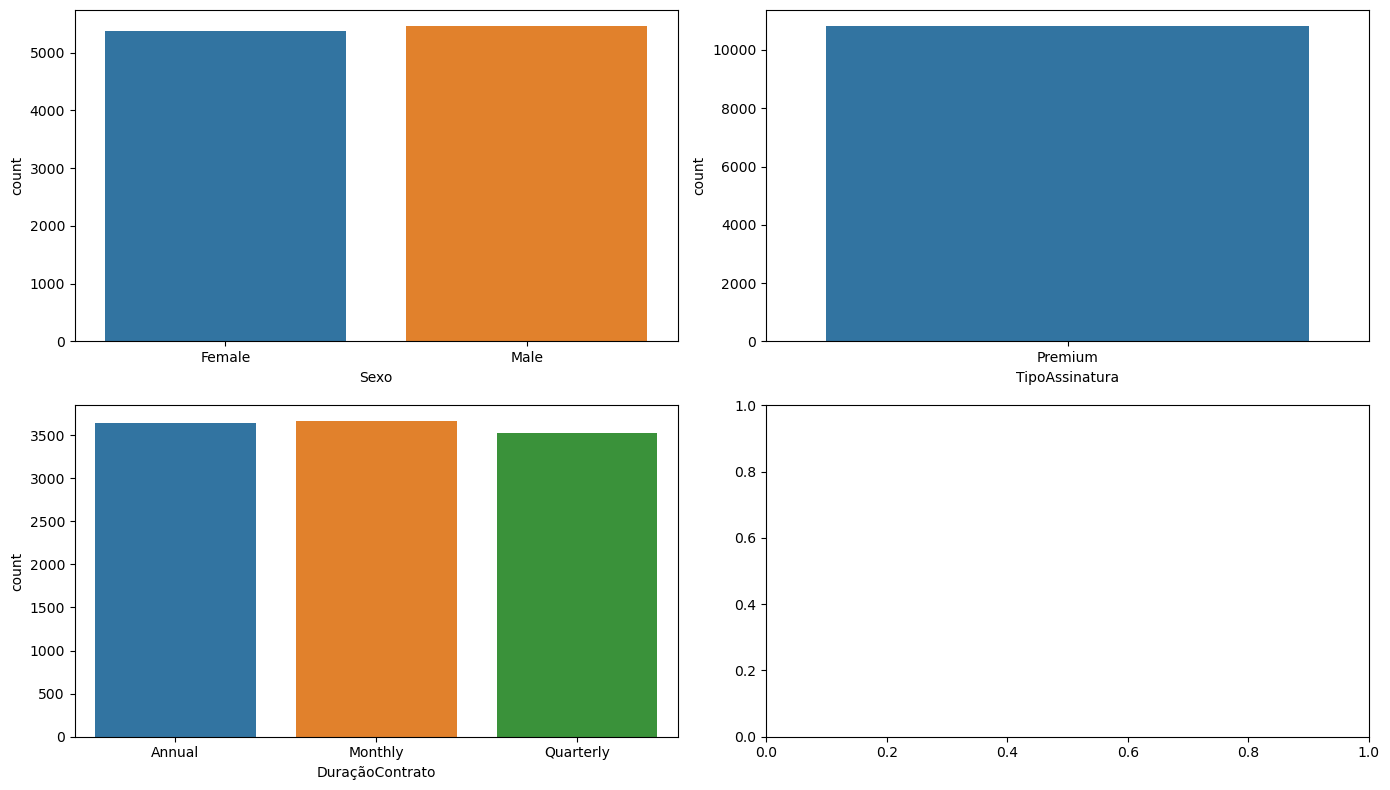

In [118]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = padrao_idoso, x="Sexo", ax=axes[0][0])
sns.countplot(data = padrao_idoso, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = padrao_idoso, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

### UMA ANÁLISE DAS PESSOAS QUE NÃO SAIRAM

In [119]:
NãoSairam = df_traduzida.loc[df_traduzida['Churn'] == 0 ]

In [120]:
NãoSairam.shape

(190833, 11)

In [121]:
NãoSairam.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
135,36.0,Female,5.0,6.0,0.0,6.0,Premium,Quarterly,787.0,9.0,0.0


### Estatística

In [122]:
NãoSairam.describe()

,Idade,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,CustoTotal,ÚltimaInteração,Churn
count,190833.000000,190833.000000,190833.000000,190833.000000,190833.000000,190833.000000,190833.000000,190833.0
mean,36.262973,32.281754,16.260552,1.586418,10.015500,749.953111,13.008804,0.0
std,9.203910,17.089172,8.446843,1.289975,6.056744,144.222792,8.291378,0.0
min,18.000000,1.000000,1.000000,0.000000,0.000000,500.000000,1.000000,0.0
25%,29.000000,18.000000,10.000000,0.000000,5.000000,625.300000,6.000000,0.0
50%,37.000000,33.000000,17.000000,1.000000,10.000000,749.980000,12.000000,0.0
75%,44.000000,47.000000,24.000000,3.000000,15.000000,874.740000,19.000000,0.0
max,50.000000,60.000000,30.000000,5.000000,20.000000,1000.000000,30.000000,0.0


# segmentação das idades

## jovens que ficaram

In [123]:
jovens_ficaram  = NãoSairam[NãoSairam['Idade']<=29] 
jovens_ficaram['Idade'].value_counts().sum()

49833

# sexo

In [124]:
sexo = jovens_ficaram.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = jovens_ficaram.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = jovens_ficaram.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = jovens_ficaram.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = jovens_ficaram.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Male,33346,543527.0,31204.0,333593.0,"$25,021,839.93"
Female,16487,267586.0,15449.0,164932.0,"$12,348,983.27"


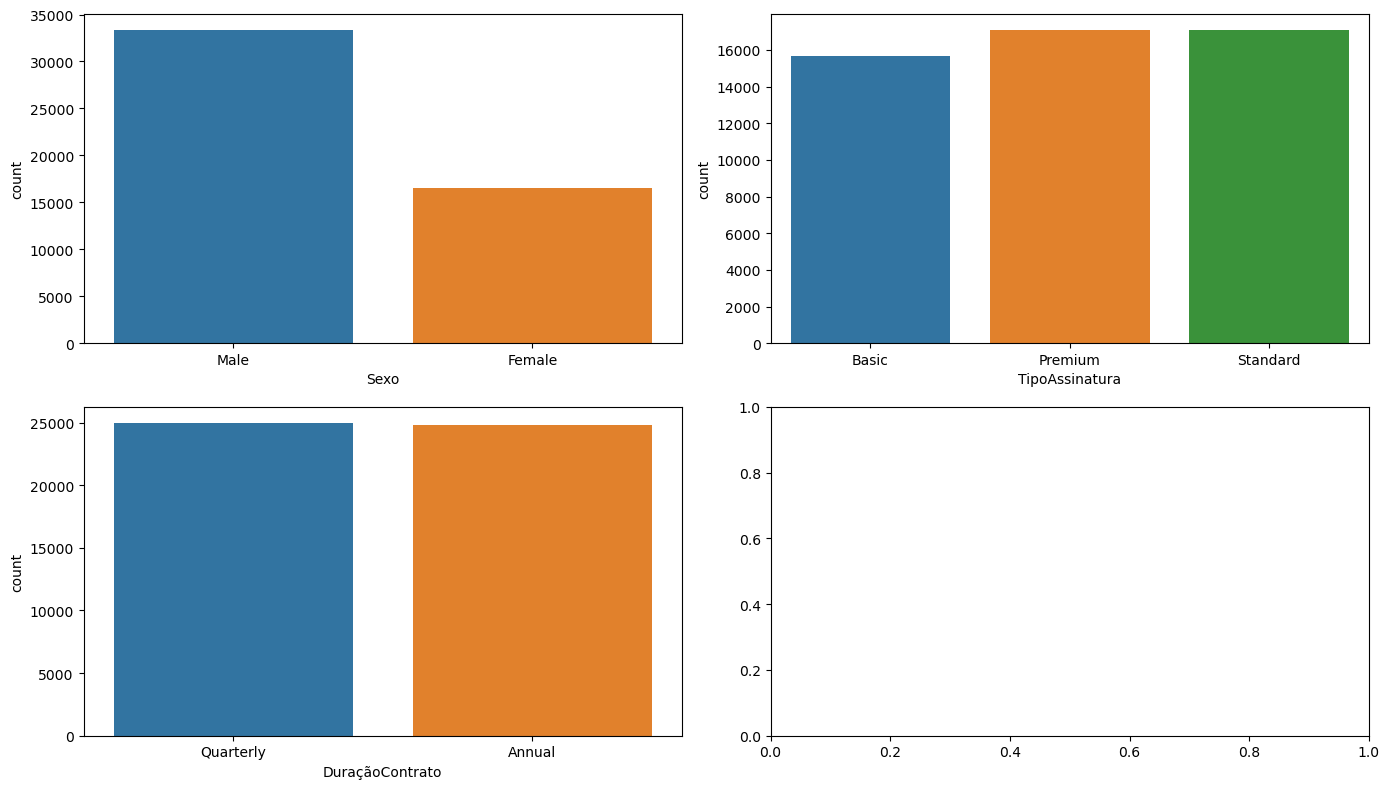

In [125]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = jovens_ficaram, x="Sexo", ax=axes[0][0])
sns.countplot(data = jovens_ficaram, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = jovens_ficaram, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

# duração de contrato dos jovens que ficaram

# anual

In [126]:
anual_ficaram = jovens_ficaram.loc[jovens_ficaram['DuraçãoContrato']== 'Annual']
anual_ficaram.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
326,28.0,Male,2.0,6.0,1.0,20.0,Premium,Annual,520.0,16.0,0.0


In [127]:
sexo = anual_ficaram.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = anual_ficaram.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = anual_ficaram.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = anual_ficaram.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = anual_ficaram.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Male,16593,270170.0,15376.0,165904.0,"$12,454,851.27"
Female,8242,134077.0,7664.0,82184.0,"$6,170,857.97"


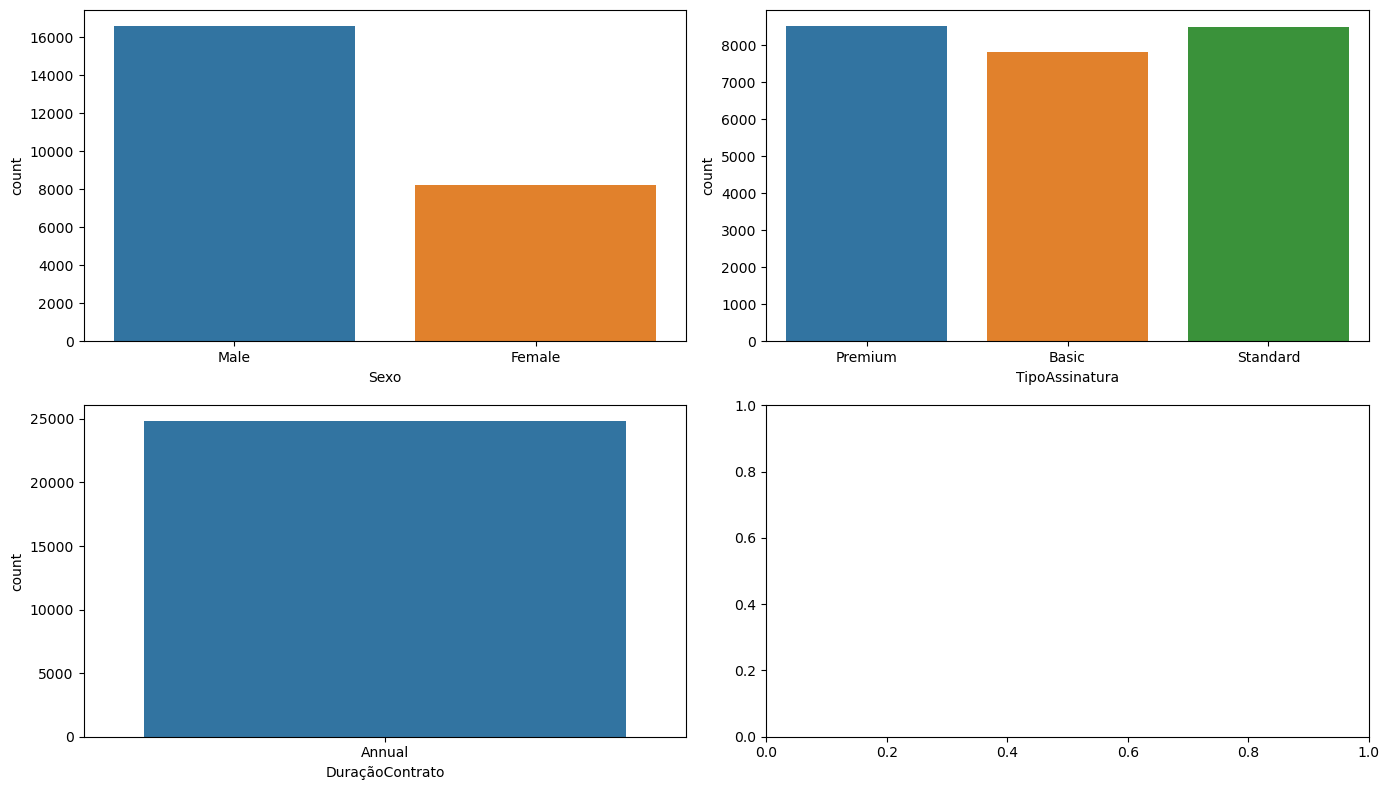

In [128]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = anual_ficaram, x="Sexo", ax=axes[0][0])
sns.countplot(data = anual_ficaram, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = anual_ficaram, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

# trimestral

In [129]:
trimestral_ficaram = jovens_ficaram.loc[jovens_ficaram['DuraçãoContrato']== 'Quarterly']
trimestral_ficaram.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
153,24.0,Male,14.0,22.0,2.0,17.0,Basic,Quarterly,594.0,18.0,0.0


In [130]:
sexo = trimestral_ficaram.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = trimestral_ficaram.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = trimestral_ficaram.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = trimestral_ficaram.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = trimestral_ficaram.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Male,16753,273357.0,15828.0,167689.0,"$12,566,988.66"
Female,8245,133509.0,7785.0,82748.0,"$6,178,125.30"


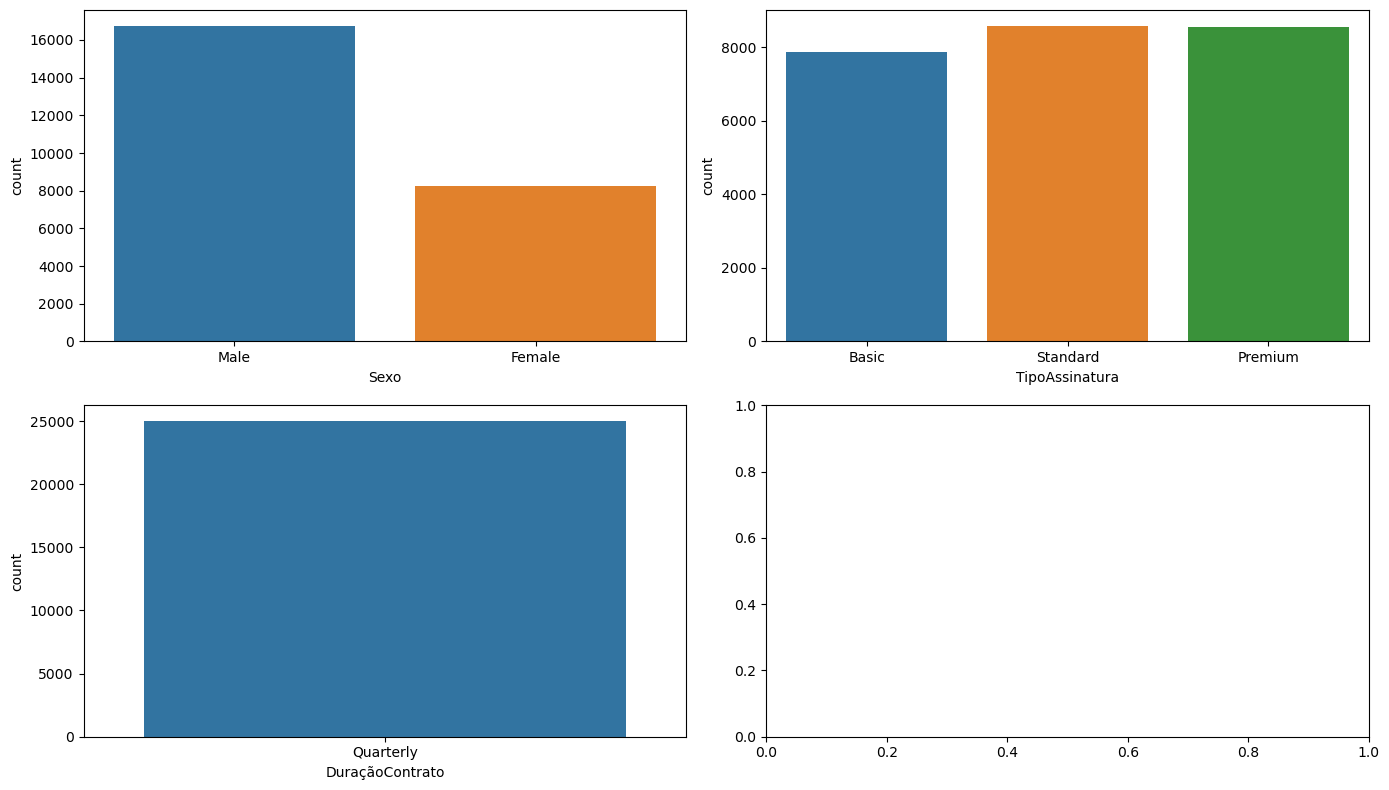

In [131]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = trimestral_ficaram, x="Sexo", ax=axes[0][0])
sns.countplot(data = trimestral_ficaram, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = trimestral_ficaram, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

# Tipo Assinatura jovens que ficaram

In [132]:
jovens_ficaram.groupby(['TipoAssinatura']).size()

TipoAssinatura
Basic       15678
Premium     17067
Standard    17088
dtype: int64

### PLANO BASICO

In [133]:
basico_jovens_ficaram = jovens_ficaram.loc[jovens_ficaram['TipoAssinatura'] == 'Basic' ]

In [134]:
sexo = basico_jovens_ficaram.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = basico_jovens_ficaram.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = basico_jovens_ficaram.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = basico_jovens_ficaram.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = basico_jovens_ficaram.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Male,10467,170823.0,9776.0,105106.0,"$7,841,797.58"
Female,5211,85086.0,4903.0,51760.0,"$3,917,338.58"


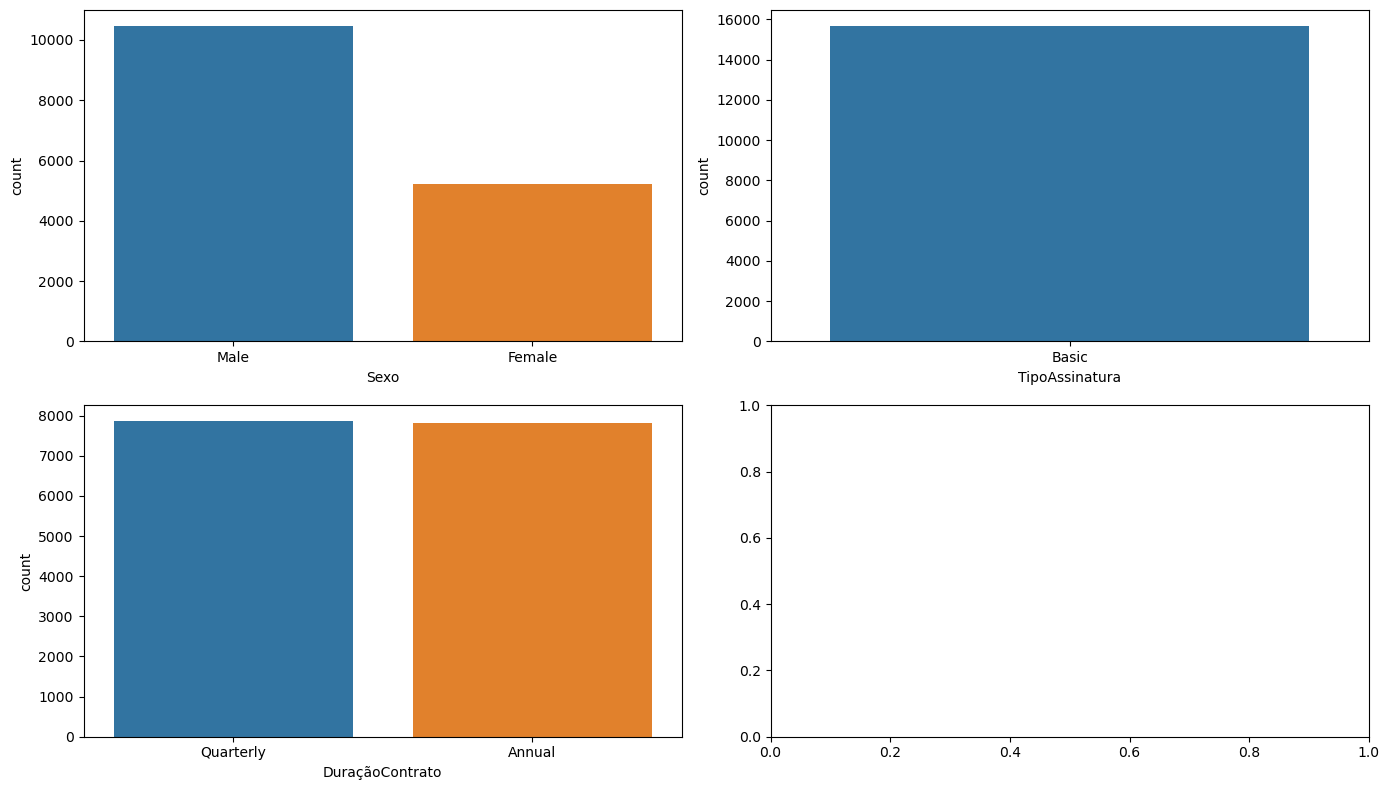

In [135]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = basico_jovens_ficaram, x="Sexo", ax=axes[0][0])
sns.countplot(data = basico_jovens_ficaram, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = basico_jovens_ficaram, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

### PLANO PREMIO

In [136]:
premio_jovens_ficaram = jovens_ficaram.loc[jovens_ficaram['TipoAssinatura'] == 'Premium' ]

In [137]:
sexo = premio_jovens_ficaram.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = premio_jovens_ficaram.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = premio_jovens_ficaram.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = premio_jovens_ficaram.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = premio_jovens_ficaram.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Male,11448,186670.0,10646.0,114030.0,"$8,596,572.88"
Female,5619,91799.0,5319.0,56697.0,"$4,192,130.15"


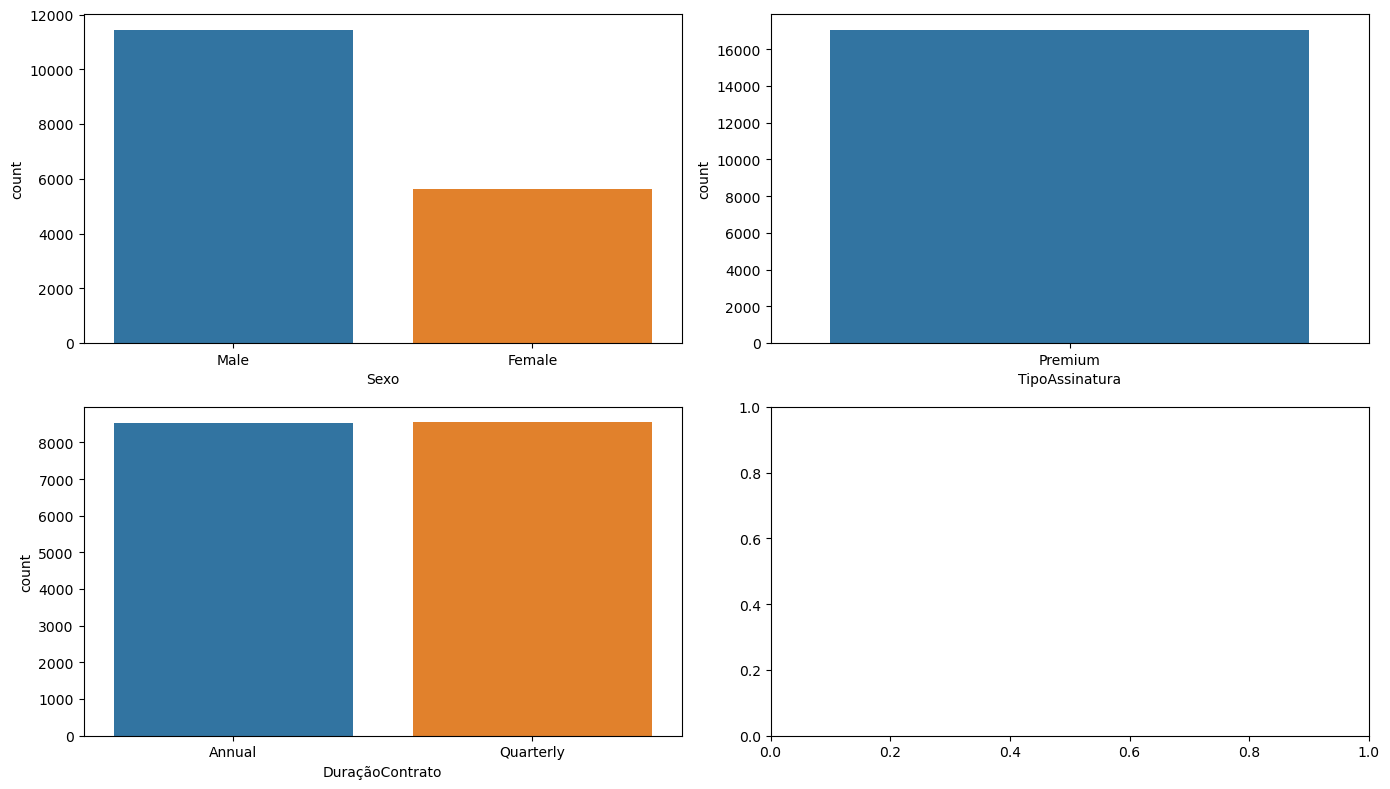

In [138]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = premio_jovens_ficaram, x="Sexo", ax=axes[0][0])
sns.countplot(data = premio_jovens_ficaram, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = premio_jovens_ficaram, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

### PLANO PADRÃO

In [139]:
padrao_jovens_ficaram = jovens_ficaram.loc[jovens_ficaram['TipoAssinatura'] == 'Standard' ]

In [140]:
sexo = padrao_jovens_ficaram.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = padrao_jovens_ficaram.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = padrao_jovens_ficaram.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = padrao_jovens_ficaram.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = padrao_jovens_ficaram.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Male,11431,186034.0,10782.0,114457.0,"$8,583,469.47"
Female,5657,90701.0,5227.0,56475.0,"$4,239,514.54"


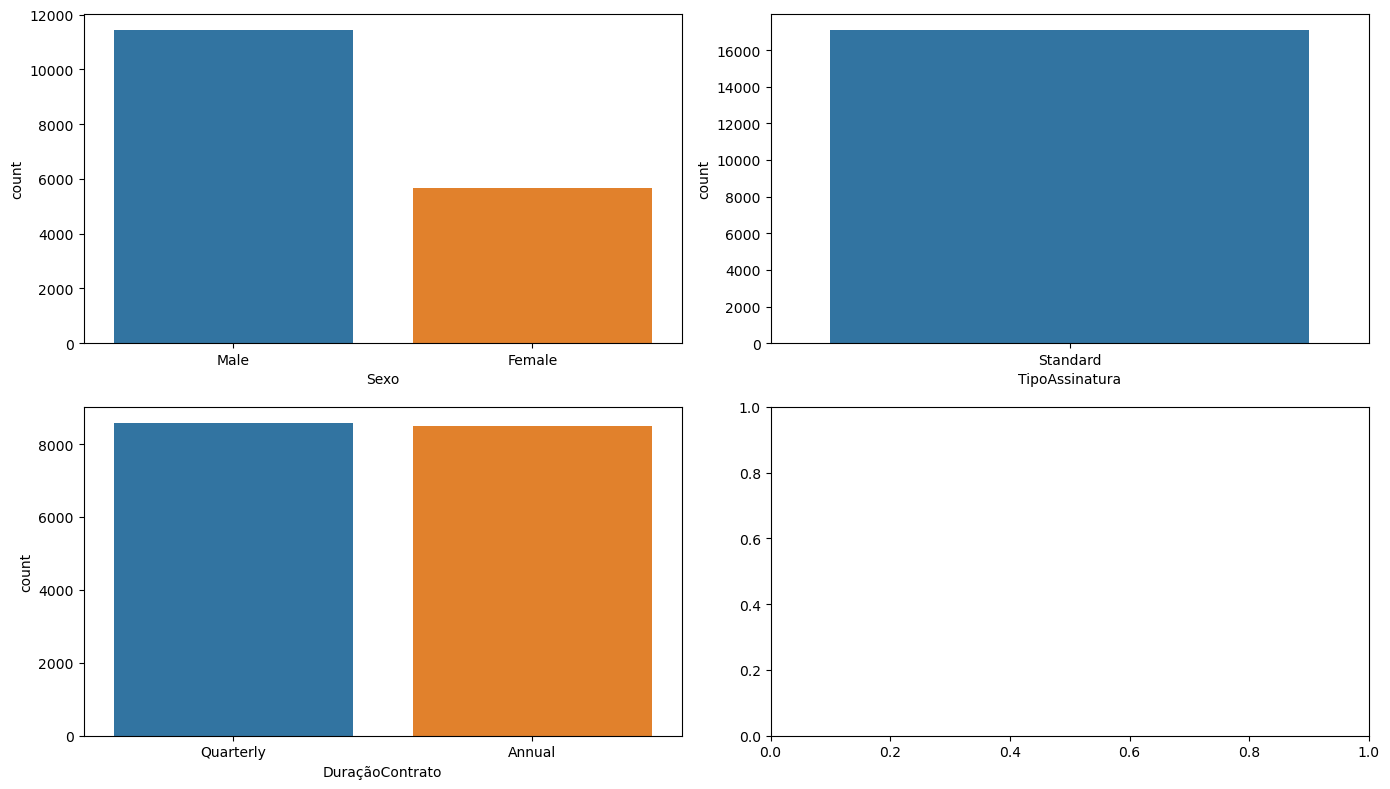

In [141]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = padrao_jovens_ficaram, x="Sexo", ax=axes[0][0])
sns.countplot(data = padrao_jovens_ficaram, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = padrao_jovens_ficaram, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

# adulto que ficaram

In [142]:
adulto_ficaram = NãoSairam.query('Idade > 29 and Idade <= 59')
adulto_ficaram['Idade'].value_counts().sum()

141000

# sexo

In [143]:
sexo = adulto_ficaram.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = adulto_ficaram.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = adulto_ficaram.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = adulto_ficaram.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = adulto_ficaram.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Male,93965,1528029.0,170701.0,942729.0,"$70,453,578.89"
Female,47035,763908.0,85387.0,470034.0,"$35,291,400.03"


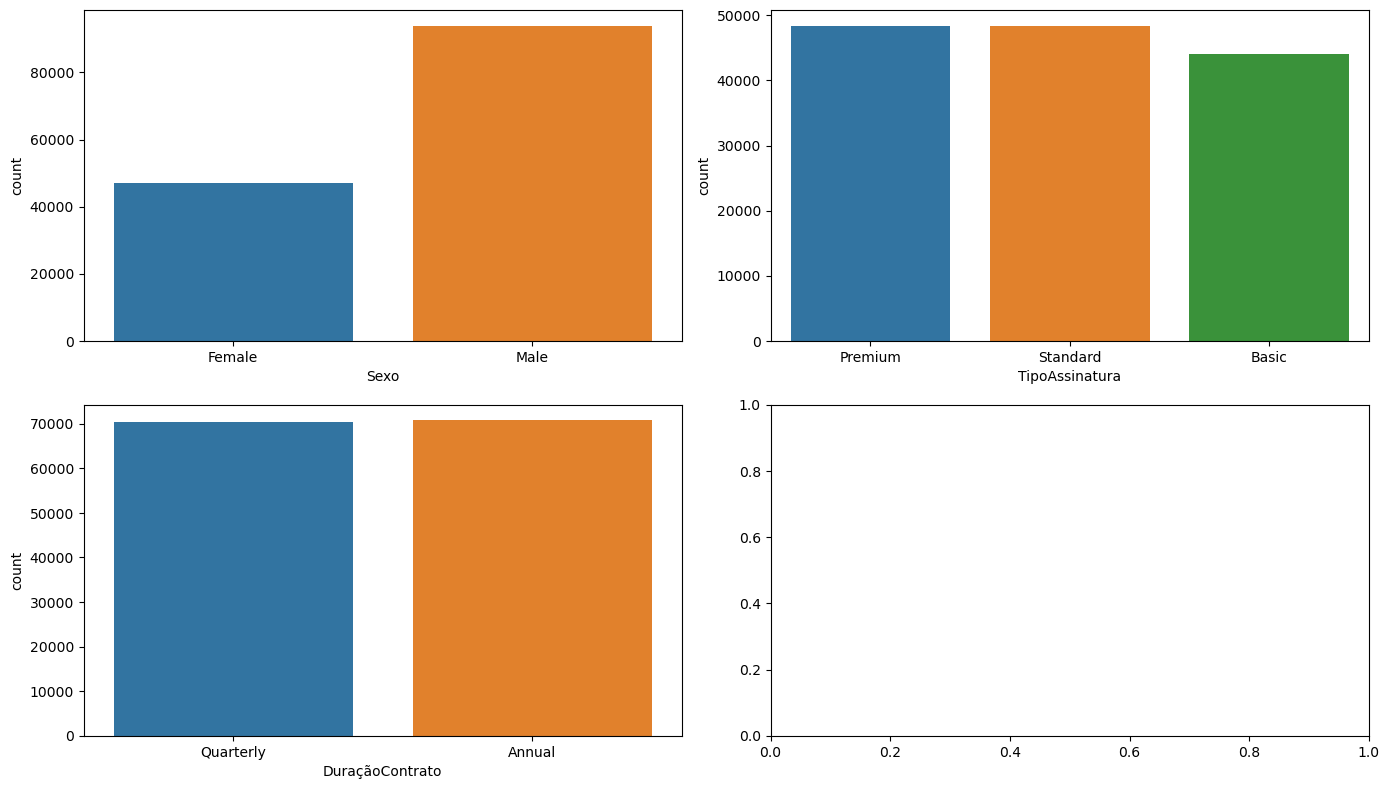

In [144]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = adulto_ficaram, x="Sexo", ax=axes[0][0])
sns.countplot(data = adulto_ficaram, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = adulto_ficaram, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

# duração de contrato dos adultos

# anual

In [145]:
anual_adulto = adulto_ficaram.loc[adulto_ficaram['DuraçãoContrato']== 'Annual']
anual_adulto.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
176,48.0,Male,3.0,30.0,1.0,10.0,Premium,Annual,850.0,29.0,0.0


In [146]:
sexo = anual_adulto.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = anual_adulto.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = anual_adulto.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = anual_adulto.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = anual_adulto.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Male,47225,767834.0,85656.0,474325.0,"$35,406,110.88"
Female,23492,381424.0,42711.0,234916.0,"$17,643,871.46"


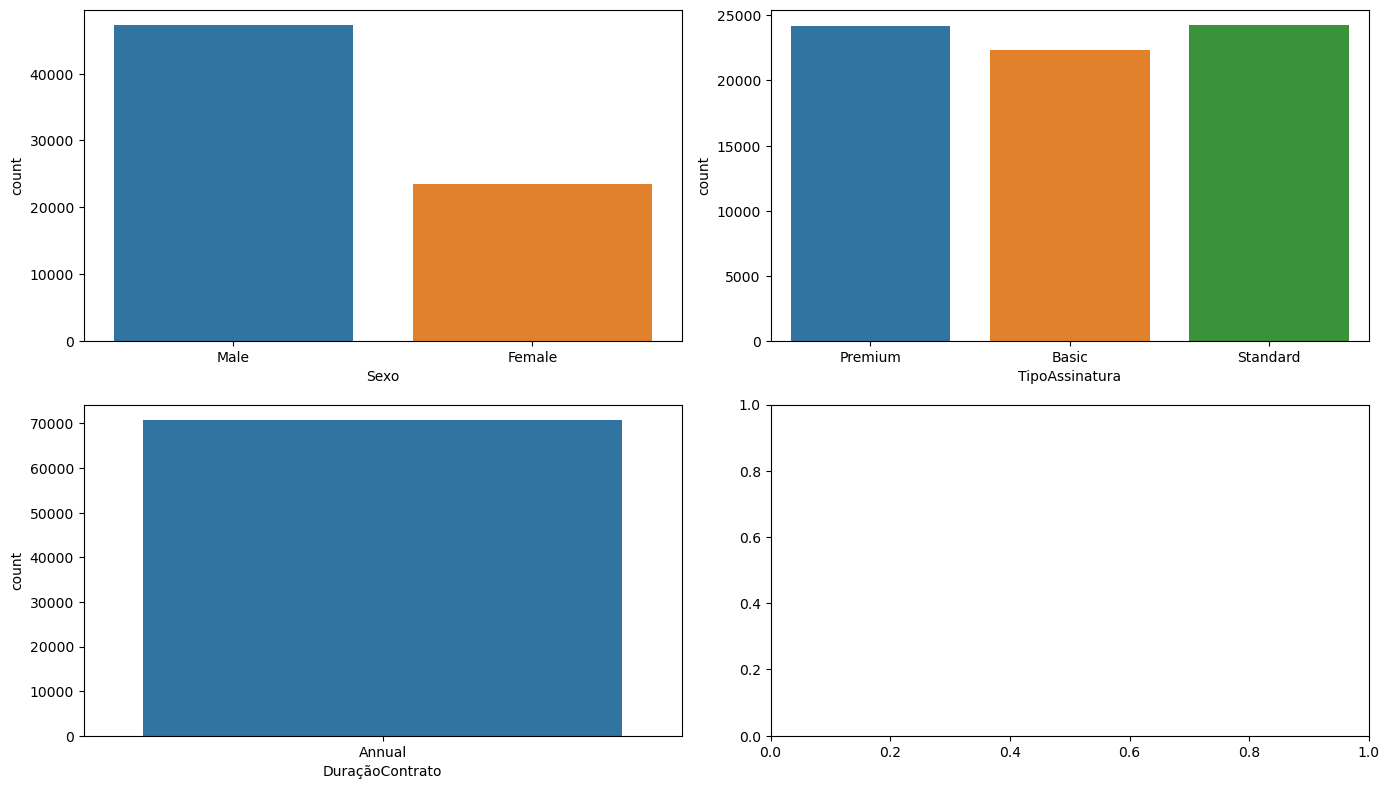

In [147]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = anual_adulto, x="Sexo", ax=axes[0][0])
sns.countplot(data = anual_adulto, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = anual_adulto, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

# trimestral

In [148]:
trimestral_adulto = adulto_ficaram.loc[adulto_ficaram['DuraçãoContrato']== 'Quarterly']
trimestral_adulto.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
135,36.0,Female,5.0,6.0,0.0,6.0,Premium,Quarterly,787.0,9.0,0.0


In [149]:
sexo = trimestral_adulto.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = trimestral_adulto.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = trimestral_adulto.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = trimestral_adulto.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = trimestral_adulto.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Male,46740,760195.0,85045.0,468404.0,"$35,047,468.01"
Female,23543,382484.0,42676.0,235118.0,"$17,647,528.57"


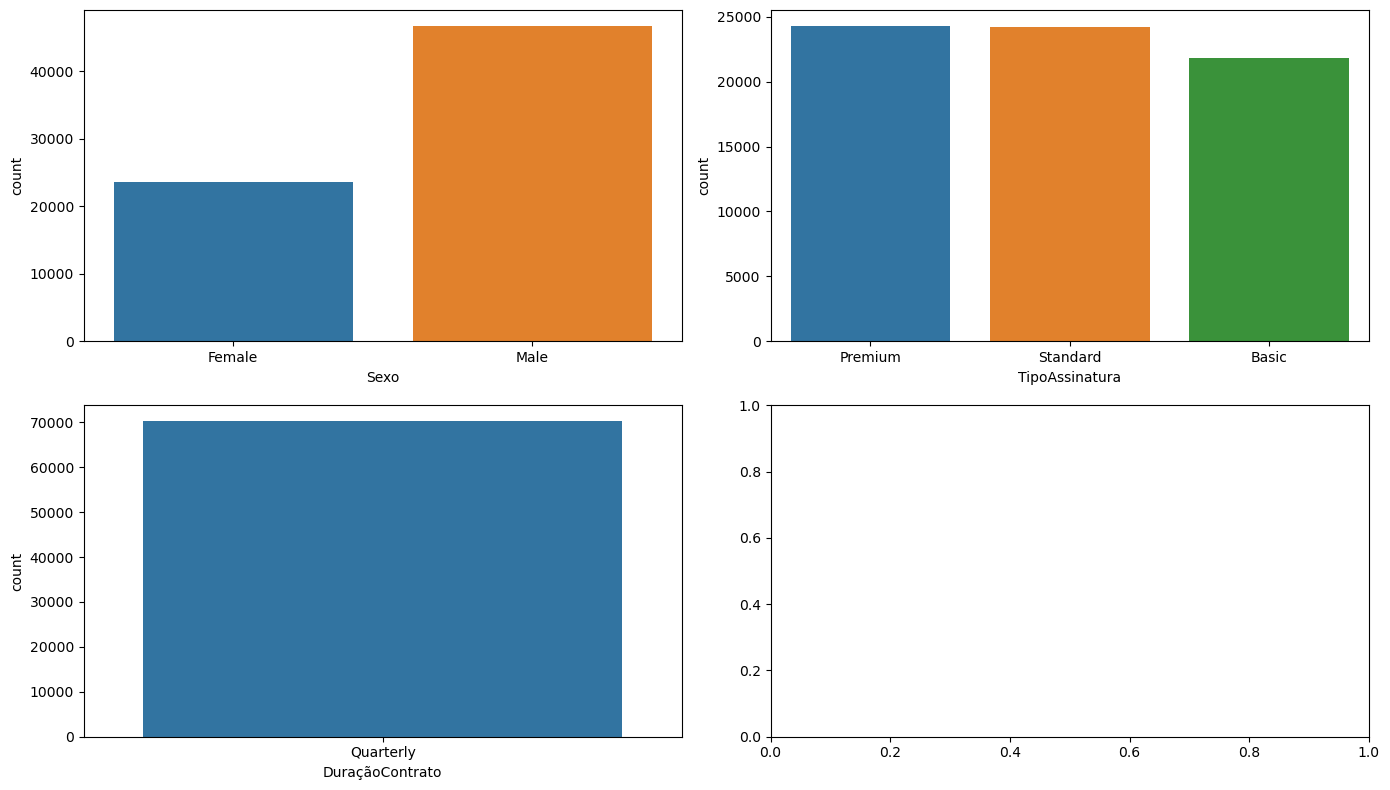

In [150]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = trimestral_adulto, x="Sexo", ax=axes[0][0])
sns.countplot(data = trimestral_adulto, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = trimestral_adulto, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

# Tipo Assinatura adultos que ficaram

In [151]:
adulto_ficaram.groupby(['TipoAssinatura']).size()

TipoAssinatura
Basic       44138
Premium     48438
Standard    48424
dtype: int64

### PLANO BASICO

In [152]:
basico_adulto_ficaram  = adulto_ficaram.loc[adulto_ficaram['TipoAssinatura'] == 'Basic']
basico_adulto_ficaram.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
234,34.0,Female,20.0,29.0,0.0,4.0,Basic,Annual,580.0,4.0,0.0


In [153]:
sexo = basico_adulto_ficaram.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = basico_adulto_ficaram.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = basico_adulto_ficaram.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = basico_adulto_ficaram.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = basico_adulto_ficaram.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Male,29498,478274.0,53675.0,295838.0,"$22,113,672.79"
Female,14640,238045.0,26615.0,146229.0,"$10,965,423.29"


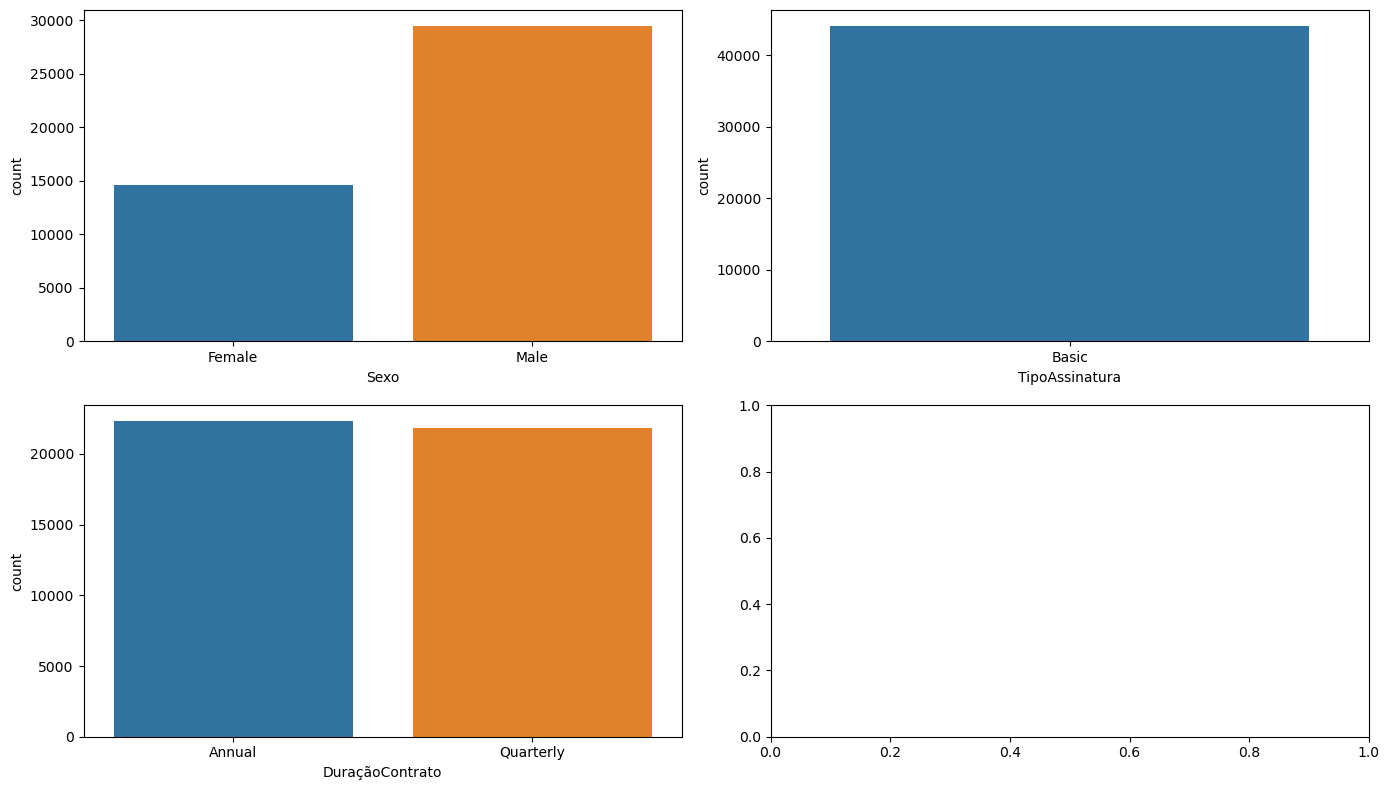

In [154]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = basico_adulto_ficaram, x="Sexo", ax=axes[0][0])
sns.countplot(data = basico_adulto_ficaram, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = basico_adulto_ficaram, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

### PLANO PREMIO

In [155]:
premio_adulto_ficaram  = adulto_ficaram.loc[adulto_ficaram['TipoAssinatura'] == 'Premium']
premio_adulto_ficaram.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
135,36.0,Female,5.0,6.0,0.0,6.0,Premium,Quarterly,787.0,9.0,0.0


In [156]:
sexo = premio_adulto_ficaram.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = premio_adulto_ficaram.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = premio_adulto_ficaram.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = premio_adulto_ficaram.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = premio_adulto_ficaram.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Male,32442,527510.0,58977.0,326011.0,"$24,351,702.44"
Female,15996,259550.0,29222.0,159118.0,"$11,995,200.97"


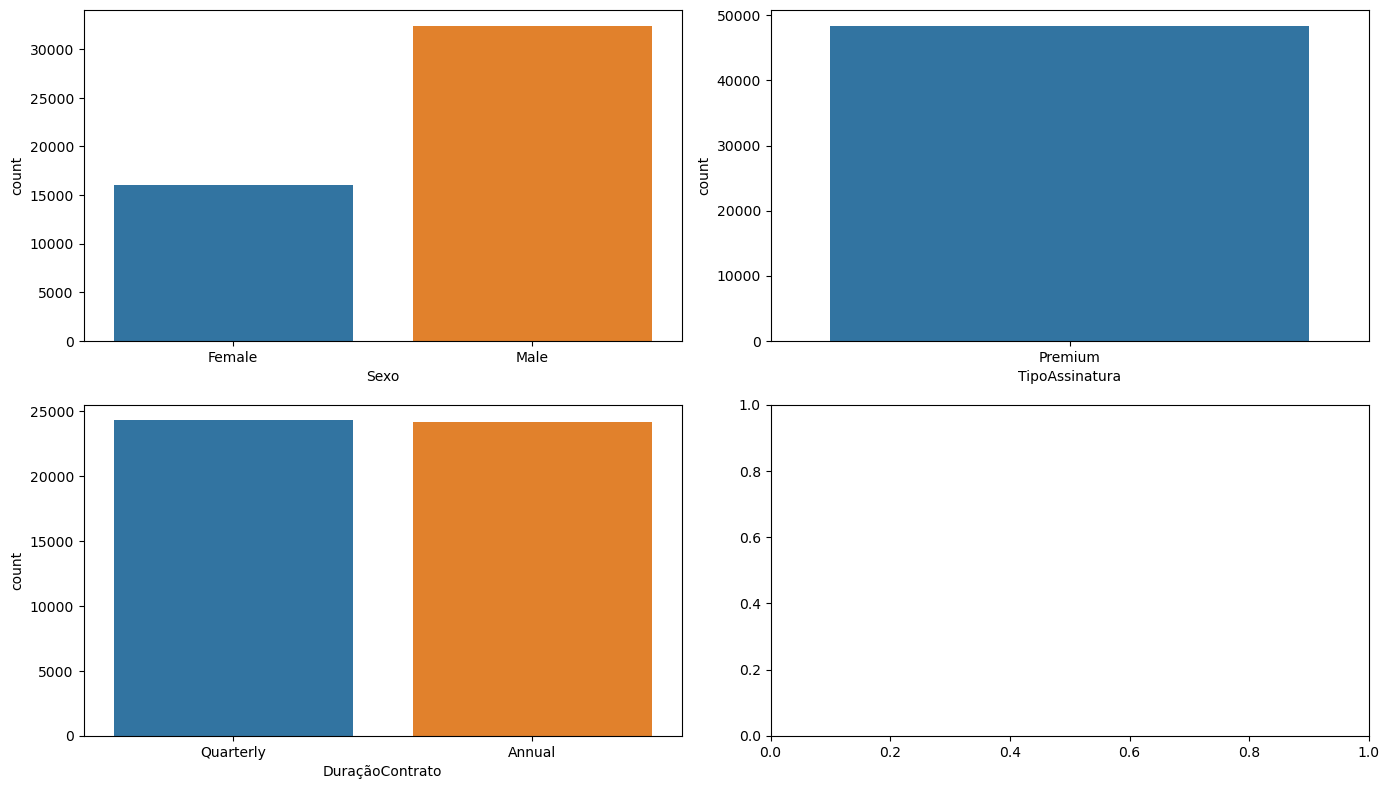

In [157]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = premio_adulto_ficaram, x="Sexo", ax=axes[0][0])
sns.countplot(data = premio_adulto_ficaram, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = premio_adulto_ficaram, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

### PLANO PADRÃO

In [158]:
padrao_adulto_ficaram  = adulto_ficaram.loc[adulto_ficaram['TipoAssinatura'] == 'Standard']
padrao_adulto_ficaram.head(1)

,Idade,Sexo,Posse,FrequênciaUso,ChamadaSuporte,AtrasoPagamento,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
146,48.0,Male,49.0,20.0,1.0,7.0,Standard,Quarterly,953.0,30.0,0.0


In [159]:
sexo = padrao_adulto_ficaram.groupby(["Sexo"]).count()["Idade"].rename('QuantidadeSexo')
freguencia = padrao_adulto_ficaram.groupby(['Sexo']).sum()['FrequênciaUso'].rename('SomaFregûencia')
chamada = padrao_adulto_ficaram.groupby(['Sexo']).sum()['ChamadaSuporte'].rename('Chamada Suporte')
atraso = padrao_adulto_ficaram.groupby(['Sexo']).sum()['AtrasoPagamento'].rename('Atraso de Pagamento')
total = padrao_adulto_ficaram.groupby(['Sexo']).sum()['CustoTotal'].rename('Valor total')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"QuantidadeSexo":sexo,'SomaFregûencia':freguencia,'ChamadaSuporte':chamada,'Atraso de Pagamento':atraso,'Valor total':total})
dados_usuarios ["Valor total"] = dados_usuarios["Valor total"].map("${:,.2f}".format)
dados_usuarios.sort_values("QuantidadeSexo", ascending=False).head(5)

,QuantidadeSexo,SomaFregûencia,ChamadaSuporte,Atraso de Pagamento,Valor total
Sexo,,,,,
Male,32025,522245.0,58049.0,320880.0,"$23,988,203.66"
Female,16399,266313.0,29550.0,164687.0,"$12,330,775.77"


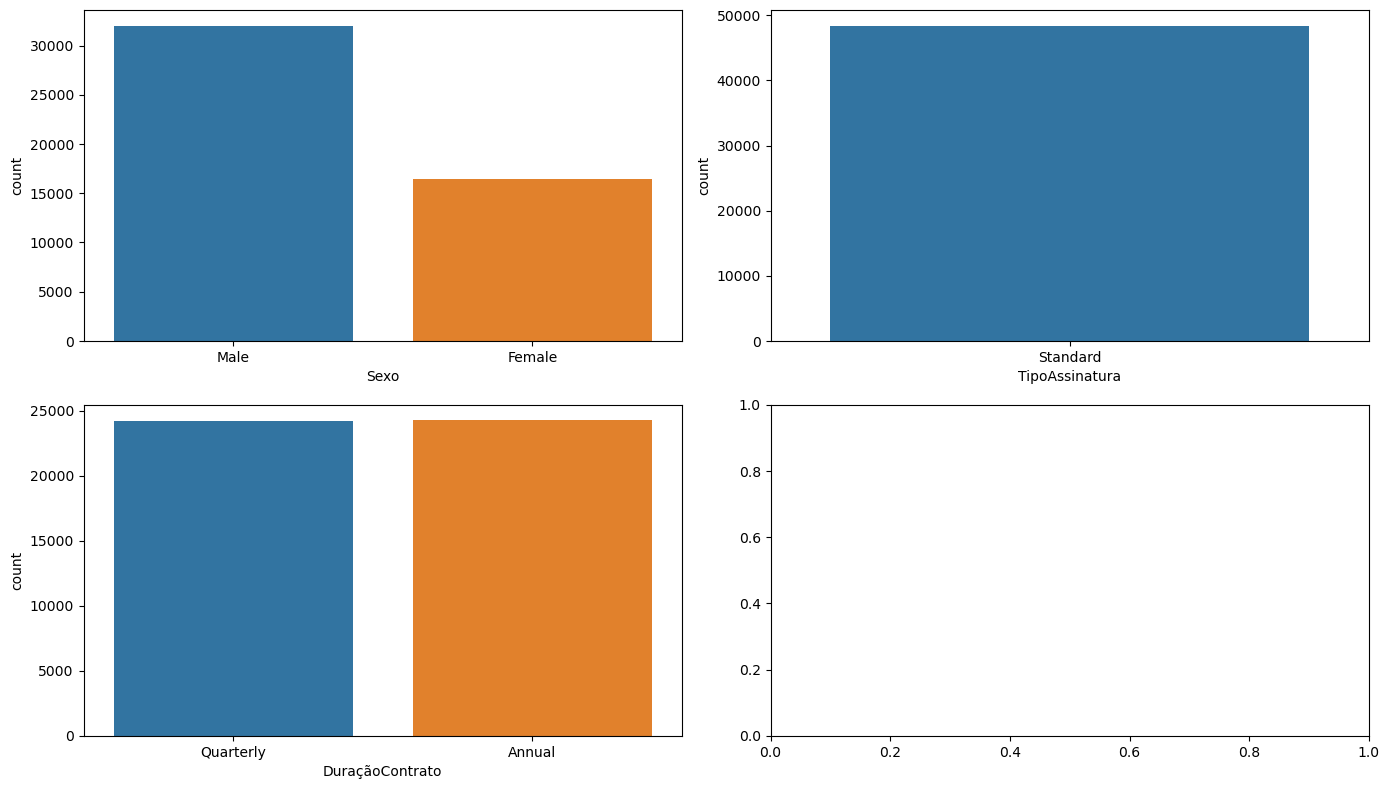

In [160]:
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2)

sns.countplot(data = padrao_adulto_ficaram, x="Sexo", ax=axes[0][0])
sns.countplot(data = padrao_adulto_ficaram, x="TipoAssinatura", ax=axes[0][1])
sns.countplot(data = padrao_adulto_ficaram, x="DuraçãoContrato", ax=axes[1][0])

plt.show()

### CAUSAS DOS CANCELAMENTOS 

* analisamos o público adultos e jovens sairam mais do que ficaram

* o público idoso todos sairam 

* quanto maior as chamadas de suporte mais sairam 

* quanto maior o uso das frequência mais sairam

* avaliamos e descobrimos que o plano mensal não foi requerido pelas pessoas que ficaram

### SUGESTÃO PARA EVITAR CANCELAMENTOS FUTUROS 

* Teriamos que fazer um plano atrativo para os jovens e os adultos 
* Teriamos que melhorar a politica de funcionamento para os idosos
* Descobrir que o atentimento não estar resolvendo os problemas dos clientes ou deixando eles insatisfeito com os atendentes
* os planos estão sendo todos ruins para os clientes, devemos alterar o regimento dos planos
* o pior plano é o mensal, devemos alterar todo o funcionamento do mesmo

# MACHINE LEARNING

## PRÉ PROCESSAMENTO

In [161]:
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
df_traduzida['Sexo'] = lb.fit_transform(df_traduzida['Sexo'])
df_traduzida['TipoAssinatura'] = lb.fit_transform(df_traduzida['TipoAssinatura'])
df_traduzida['DuraçãoContrato'] = lb.fit_transform(df_traduzida['DuraçãoContrato'])

# Remove valores missing eventualmente gerados
df_traduzida.dropna(inplace = True)

In [162]:
del df_traduzida['Posse']
del df_traduzida['FrequênciaUso']
del df_traduzida['AtrasoPagamento']
del df_traduzida['ChamadaSuporte']

In [163]:
# Separa X e y
X = df_traduzida.iloc[:, :-1]
y = df_traduzida.iloc[:, -1]

Contagem de classes antes do balanceamento:
1.0    249999
0.0    190833
Name: Churn, dtype: int64

Contagem de classes após o balanceamento:
1.0    249999
0.0    249999
Name: Churn, dtype: int64


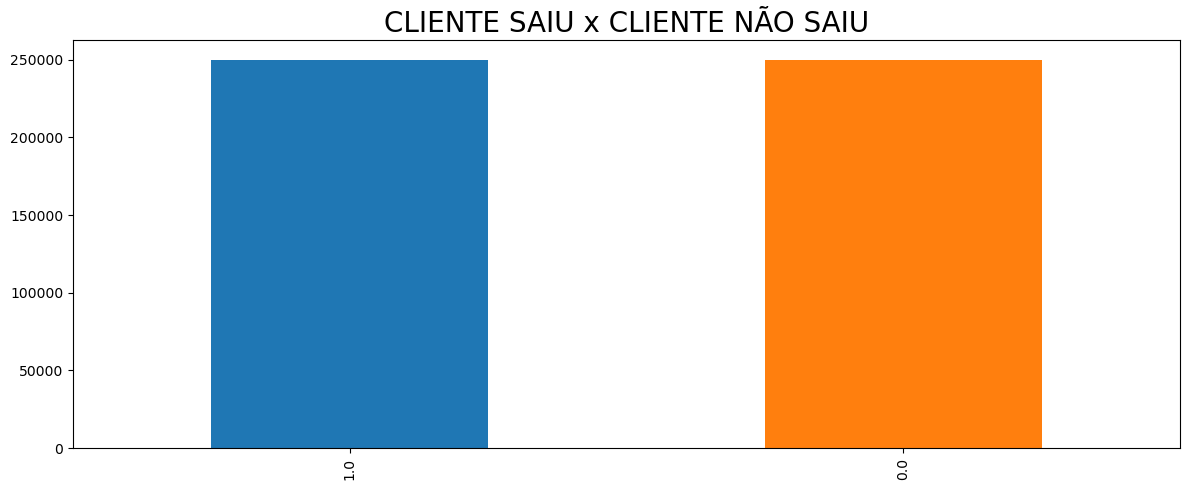

In [164]:

# Seed para reproduzir o mesmo resultado
seed = 100

# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state=seed)

# Verifica a contagem de classes antes do balanceamento
print("Contagem de classes antes do balanceamento:")
print(y.value_counts())

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

# Verifica a contagem de classes após o balanceamento
print("\nContagem de classes após o balanceamento:")
print(pd.Series(y_res).value_counts())


# Visualizando o balanceamento da variável TARGET
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
y_res.value_counts().plot(kind='bar', title='CLIENTE SAIU x CLIENTE NÃO SAIU',color = ['#1F77B4', '#FF7F0E']);

### ESCOLHENDO AS MELHORES VARIAVEIS

In [165]:
df_traduzida.head(1)

,Idade,Sexo,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração,Churn
0,30.0,0,2,0,932.0,17.0,1.0


In [166]:
from sklearn.ensemble import ExtraTreesClassifier

# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier()
modelo.fit(X, y)

ExtraTreesClassifier()

In [167]:
# Print dos Resultados
print(df_traduzida.columns[0:8])
print(modelo.feature_importances_)

Index(['Idade', 'Sexo', 'TipoAssinatura', 'DuraçãoContrato', 'CustoTotal',
       'ÚltimaInteração', 'Churn'],
      dtype='object')
[0.20342008 0.04134026 0.00328218 0.1752675  0.44924036 0.12744962]


In [168]:
# SEPRANDO AS VARIAVEIS PARA TREINAMENTO

# Train Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.3, random_state=42)

In [169]:
#Random Forest Regressor:
from sklearn.ensemble import RandomForestClassifier
modelo2 = RandomForestClassifier()
modelo2 = modelo2.fit(X_train, y_train)

#Prediction:
y_predito = modelo2.predict(X_test)

#Scores:
print(r2_score(y_test, y_predito))
print(mean_squared_error(y_test, y_predito))

0.6042859938761698
0.09892666666666666


In [170]:
# Avaliando as previsões
accuracy = accuracy_score(y_test, y_predito)
print("Acurácia: %.2f%%" % (accuracy * 100.0))



Acurácia: 90.11%


### AVALIANDO PELA MATRIZ DE CONFUSÃO

In [171]:
#Using confusion matrix to find the accuracy
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_predito)

accuracy = cm.diagonal().sum()/cm.sum()

print("\n---------------------------\n")
print("Accuracy of Predictions = ",accuracy)

print("\n---------------------------\n")
print(classification_report(y_test, y_predito))
print(cm)


---------------------------

Accuracy of Predictions =  0.9010733333333333

---------------------------

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.90     74677
         1.0       0.94      0.86      0.90     75323

    accuracy                           0.90    150000
   macro avg       0.90      0.90      0.90    150000
weighted avg       0.90      0.90      0.90    150000

[[70587  4090]
 [10749 64574]]


### FAZENDO A PREDIÇÃO

In [172]:
Idade = 36
Sexo = 1
TipoAssinatura = 0
DuraçãoContrato = 0


CustoTotal = 654
ÚltimaInteração = 36
parametro = [[Idade,Sexo,TipoAssinatura,DuraçãoContrato,CustoTotal,ÚltimaInteração]]

fazendo_previsao = modelo2.predict(parametro)
probabilidade = modelo2.predict_proba(parametro)


if (fazendo_previsao == 0).any():
    print('NÃO VAI CANCELAR ')
    print("A PROBABILIDADE DE NÃO SAIR É DE ",probabilidade)

else:
    
    print('VAI CANCELAR')
    print("A PROBABILIDADE DE SAIR É DE ",probabilidade)


NÃO VAI CANCELAR 
A PROBABILIDADE DE NÃO SAIR É DE  [[0.98 0.02]]


In [173]:
#Comando de Salvamento da Máquina Preditiva
import pickle 
pickle_out = open("maquina_preditiva4.pkl", mode = "wb") 
pickle.dump(modelo2, pickle_out) 
pickle_out.close() 